# Jupyter Notebook to create regional  cutouts of Figures 6, 8, 9, 12, and 15 from Cayan, Pierce, and Kalansky (2018)
 - If new to Python, I recommend installing Python3 via Anaconda (https://anaconda.org/anaconda/python) and then installing the `netCDF4` and `cartopy` packages after the general install finishes with `conda install netCDF4` and `conda install cartopy`

In [1]:
# Load modules 
import netCDF4
import cartopy
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load state and county boundary shapefiles
- State boundaries comes pre-installed with Cartopy
- You will need to download county shapefile (cb_2016_us_county_20m.shp) from https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html and update path information below

In [2]:
states_provinces = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

counties = cartopy.feature.ShapelyFeature(cartopy.io.shapereader.Reader(
            '/Users/nberg/.local/share/cartopy/shapefiles/counties/cb_2016_us_county_20m.shp').geometries(),
            ccrs.PlateCarree(), 
            facecolor='none')

# Load the region mask file
- Change `mask_dir` to wherever you have saved the mask netCDF file

In [4]:
# Read in the subregion mask file 
mask_dir = '/Users/nberg/Documents/CA4thAssessment/data/invariant/'
mask_nc = netCDF4.Dataset(mask_dir+'loca_CC4A_subregion_masks.nc', 'r')
lat = mask_nc.variables['lat'][:]
lon = mask_nc.variables['lon'][:]
region_arr = mask_nc.variables['region'][:,:] #2D array of integers based on the key below
mask_nc.close()

# Region-to-number key:
# Outside any subregion = 0
# San Diego = 1
# Inland South = 2
# Los Angeles = 3
# Central Coast = 4
# San Joaquin Valley = 5
# Sierra Nevada Mountains = 6
# San Francisco Bay Area = 7
# Sacramento Valley = 8
# North Coast = 9

region_dict = {
            'San Diego': 1,
            'Inland South': 2,
            'Los Angeles': 3,
            'Central Coast': 4,
            'San Joaquin Valley': 5,
            'Sierra Nevada Mountains': 6,
            'San Francisco Bay Area': 7,
            'Sacramento Valley': 8,
            'North Coast': 9
            }  

# Define your region below 
 - Replace 'Los Angeles' with 'San Diego', 'Inland South', 'Central Coast', 'San Joaquin Valley', 'Sierra Nevada Mountains', 'San Francisco Bay Area', 'Sacramento Valley', or 'North Coast'

In [5]:
region_name = 'Central Coast'
region_code = region_dict[region_name]

# Figure 6 (Early vs Late Historical Tmax, Tmin, and Pr)
- Change `fig6_dir` to the directory where you have saved the netCDF files
- Change start/end/number ticks in `plot_ticks = np.linspace(1,10,10, endpoint=True)`
- Change `w_pad` (and/or `h_pad`) in `fig.tight_layout(w_pad=3)`


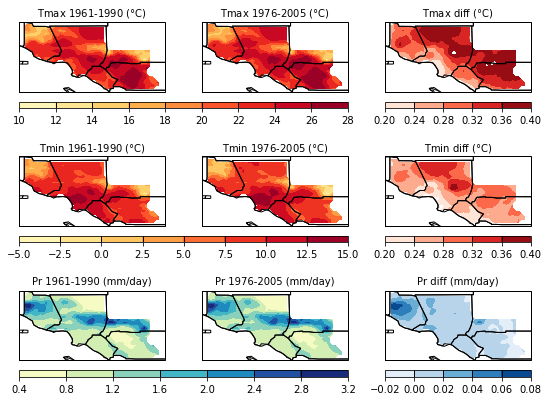

In [8]:
# Figure 6 ----- (need to crop to standard domain)
fig6_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig6/'
tmax_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.early_period.nc', 'r')
tmax_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.late_period.nc', 'r')
tmax_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.diff_periods.nc', 'r')
tmin_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.early_period.nc', 'r')
tmin_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.late_period.nc', 'r')
tmin_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.diff_periods.nc', 'r')
pr_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.early_period.nc', 'r')
pr_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.late_period.nc', 'r')
pr_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.diff_periods.nc', 'r')

# The LOCA grids used in Fig 6 need to be trimmed to match the grids used in Figs 12 and 15
tmax_early = tmax_early_nc.variables['z'][2:175,0:169]
tmax_late = tmax_late_nc.variables['z'][2:175,0:169]
tmax_diff = tmax_diff_nc.variables['z'][2:175,0:169]
tmin_early = tmin_early_nc.variables['z'][2:175,0:169]
tmin_late = tmin_late_nc.variables['z'][2:175,0:169]
tmin_diff = tmin_diff_nc.variables['z'][2:175,0:169]
pr_early = pr_early_nc.variables['z'][2:175,0:169]
pr_late = pr_late_nc.variables['z'][2:175,0:169]
pr_diff = pr_diff_nc.variables['z'][2:175,0:169]

tmax_early_nc.close()
tmax_late_nc.close()
tmax_diff_nc.close()
tmin_early_nc.close()
tmin_late_nc.close()
tmin_diff_nc.close()
pr_early_nc.close()
pr_late_nc.close()
pr_diff_nc.close()

# Cut out the region
tmax_early_reg = np.ma.masked_where(region_arr!=region_code, tmax_early)
tmax_late_reg = np.ma.masked_where(region_arr!=region_code, tmax_late)
tmax_diff_reg = np.ma.masked_where(region_arr!=region_code, tmax_diff)
tmin_early_reg = np.ma.masked_where(region_arr!=region_code, tmin_early)
tmin_late_reg = np.ma.masked_where(region_arr!=region_code, tmin_late)
tmin_diff_reg = np.ma.masked_where(region_arr!=region_code, tmin_diff)
pr_early_reg = np.ma.masked_where(region_arr!=region_code, pr_early)
pr_late_reg = np.ma.masked_where(region_arr!=region_code, pr_late)
pr_diff_reg = np.ma.masked_where(region_arr!=region_code, pr_diff)

# 9-panel plot 
fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(3, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Tmax 1961-1990 '+'('+r'$\degree$'+'C)', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, tmax_early_reg, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax2 = fig.add_subplot(3, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('Tmax 1976-2005 '+'('+r'$\degree$'+'C)', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, tmax_late_reg, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax3 = fig.add_subplot(3, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('Tmax diff '+'('+r'$\degree$'+'C)', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
ticks3 = np.linspace(0.20,0.40,6, endpoint=True)
plot3 = ax3.contourf(lon, lat, tmax_diff_reg, ticks3, transform=ccrs.PlateCarree(), cmap='Reds')

ax4 = fig.add_subplot(3, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('Tmin 1961-1990 '+'('+r'$\degree$'+'C)', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, tmin_early_reg, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax5 = fig.add_subplot(3, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('Tmin 1976-2005 '+'('+r'$\degree$'+'C)', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, tmin_late_reg, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax6 = fig.add_subplot(3, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('Tmin diff '+'('+r'$\degree$'+'C)', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
ticks6 = np.linspace(0.20,0.40,6, endpoint=True)
plot6 = ax6.contourf(lon, lat, tmin_diff_reg, ticks6, transform=ccrs.PlateCarree(), cmap='Reds')

ax7 = fig.add_subplot(3, 3, 7, projection=ccrs.PlateCarree())
ax7.coastlines('50m')
ax7.set_title('Pr 1961-1990 (mm/day)', fontsize=10)
ax7.add_feature(states_provinces, edgecolor='black')
ax7.add_feature(counties, edgecolor='black')
plot7 = ax7.contourf(lon, lat, pr_early_reg, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax8 = fig.add_subplot(3, 3, 8, projection=ccrs.PlateCarree())
ax8.coastlines('50m')
ax8.set_title('Pr 1976-2005 (mm/day)', fontsize=10)
ax8.add_feature(states_provinces, edgecolor='black')
ax8.add_feature(counties, edgecolor='black')
plot8 = ax8.contourf(lon, lat, pr_late_reg, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax9 = fig.add_subplot(3, 3, 9, projection=ccrs.PlateCarree())
ax9.coastlines('50m')
ax9.set_title('Pr diff (mm/day)', fontsize=10)
ax9.add_feature(states_provinces, edgecolor='black')
ax9.add_feature(counties, edgecolor='black')
ticks9 = np.linspace(-0.02,0.08,6)
plot9 = ax9.contourf(lon, lat, pr_diff_reg, ticks9, transform=ccrs.PlateCarree(), cmap='Blues')

fig.tight_layout(w_pad=3) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()
ax7_pos = ax7.get_position()
ax8_pos = ax8.get_position()
ax9_pos = ax9.get_position()

# Colorbar for panels 1 and 2 
cbar_ax12 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.045, ax2_pos.x1-ax1_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar12 = plt.colorbar(plot2,cax=cbar_ax12,orientation='horizontal', drawedges=True)
cbar12.dividers.set_edgecolor('black')
cbar12.dividers.set_linewidth(1)

# Colorbar for panel 3
cbar_ax3 = fig.add_axes([ax3_pos.x0, ax3_pos.y0+0.045, ax3_pos.x1-ax3_pos.x0, cbar_height]) 
cbar3 = plt.colorbar(plot3, cax=cbar_ax3, orientation='horizontal', ticks=ticks3, drawedges=True)
cbar3.dividers.set_edgecolor('black')
cbar3.dividers.set_linewidth(1)

# Colorbar for panels 4 and 5 
cbar_ax45 = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.045, ax5_pos.x1-ax4_pos.x0, cbar_height]) 
cbar45 = plt.colorbar(plot5,cax=cbar_ax45,orientation='horizontal', drawedges=True)
cbar45.dividers.set_edgecolor('black')
cbar45.dividers.set_linewidth(1)

# Colorbar for panel 6
cbar_ax6 = fig.add_axes([ax6_pos.x0, ax6_pos.y0+0.045, ax6_pos.x1-ax6_pos.x0, cbar_height]) 
cbar6 = plt.colorbar(plot6, cax=cbar_ax6, orientation='horizontal', ticks=ticks6, drawedges=True)
cbar6.dividers.set_edgecolor('black')
cbar6.dividers.set_linewidth(1)

# Colorbar for panels 7 and 8
cbar_ax78 = fig.add_axes([ax7_pos.x0, ax7_pos.y0+0.045, ax8_pos.x1-ax7_pos.x0, cbar_height]) 
cbar78 = plt.colorbar(plot8,cax=cbar_ax78,orientation='horizontal', drawedges=True)
cbar78.dividers.set_edgecolor('black')
cbar78.dividers.set_linewidth(1)

# Colorbar for panel 9
cbar_ax9 = fig.add_axes([ax9_pos.x0, ax9_pos.y0+0.045, ax9_pos.x1-ax9_pos.x0, cbar_height]) 
cbar9 = plt.colorbar(plot9, cax=cbar_ax9, orientation='horizontal', ticks=ticks9, drawedges=True)
cbar9.dividers.set_edgecolor('black')
cbar9.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(hspace=0.4, wspace=0.25)
#plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig6_LA_region.eps')
plt.show()

0.287991 0.675323


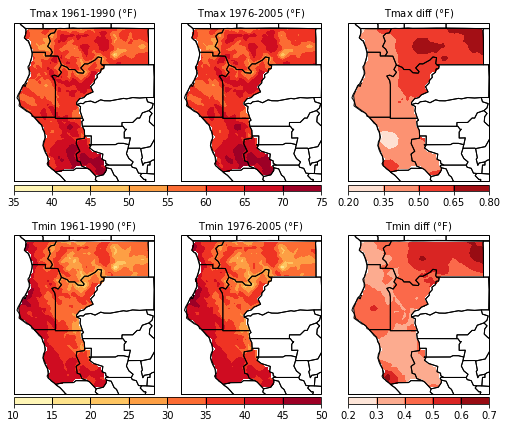

In [16]:
# Figure 6: NORTH COAST ----- (need to crop to standard domain)
fig6_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig6/'
tmax_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.early_period.nc', 'r')
tmax_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.late_period.nc', 'r')
tmax_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.diff_periods.nc', 'r')
tmin_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.early_period.nc', 'r')
tmin_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.late_period.nc', 'r')
tmin_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.diff_periods.nc', 'r')
pr_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.early_period.nc', 'r')
pr_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.late_period.nc', 'r')
pr_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.diff_periods.nc', 'r')

# The LOCA grids used in Fig 6 need to be trimmed to match the grids used in Figs 12 and 15
tmax_early = tmax_early_nc.variables['z'][2:175,0:169]
tmax_late = tmax_late_nc.variables['z'][2:175,0:169]
#tmax_diff = tmax_diff_nc.variables['z'][2:175,0:169]
tmin_early = tmin_early_nc.variables['z'][2:175,0:169]
tmin_late = tmin_late_nc.variables['z'][2:175,0:169]
#tmin_diff = tmin_diff_nc.variables['z'][2:175,0:169]
pr_early = pr_early_nc.variables['z'][2:175,0:169]
pr_late = pr_late_nc.variables['z'][2:175,0:169]
pr_diff = pr_diff_nc.variables['z'][2:175,0:169]

# Convert from degrees C to degrees F
tmax_early = tmax_early*(9./5.) + 32. 
tmax_late = tmax_late*(9./5.) + 32.
tmax_diff = tmax_late - tmax_early

tmin_early = tmin_early*(9./5.) + 32. 
tmin_late = tmin_late*(9./5.) + 32.
tmin_diff = tmin_late - tmin_early

tmax_early_nc.close()
tmax_late_nc.close()
tmax_diff_nc.close()
tmin_early_nc.close()
tmin_late_nc.close()
tmin_diff_nc.close()
pr_early_nc.close()
pr_late_nc.close()
pr_diff_nc.close()

# Cut out the region
tmax_early_reg = np.ma.masked_where(region_arr!=region_code, tmax_early)
tmax_late_reg = np.ma.masked_where(region_arr!=region_code, tmax_late)
tmax_diff_reg = np.ma.masked_where(region_arr!=region_code, tmax_diff)
tmin_early_reg = np.ma.masked_where(region_arr!=region_code, tmin_early)
tmin_late_reg = np.ma.masked_where(region_arr!=region_code, tmin_late)
tmin_diff_reg = np.ma.masked_where(region_arr!=region_code, tmin_diff)

#print(np.min(tmin_early_reg), np.max(tmin_early_reg))
#print(np.min(tmin_late_reg), np.max(tmin_late_reg))
print(np.min(tmin_diff_reg), np.max(tmin_diff_reg))
# 6-panel plot 
fig = plt.figure(figsize=(7,6))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Tmax 1961-1990 '+'('+r'$\degree$'+'F)', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks12 = np.linspace(35,75,9, endpoint=True)
plot1 = ax1.contourf(lon, lat, tmax_early_reg, ticks12, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('Tmax 1976-2005 '+'('+r'$\degree$'+'F)', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, tmax_late_reg, ticks12, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('Tmax diff '+'('+r'$\degree$'+'F)', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
ticks3 = np.linspace(.2,.8,5, endpoint=True)
plot3 = ax3.contourf(lon, lat, tmax_diff_reg, ticks3, transform=ccrs.PlateCarree(), cmap='Reds')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('Tmin 1961-1990 '+'('+r'$\degree$'+'F)', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
ticks45 = np.linspace(10,50,9, endpoint=True)
plot4 = ax4.contourf(lon, lat, tmin_early_reg, ticks45, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('Tmin 1976-2005 '+'('+r'$\degree$'+'F)', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, tmin_late_reg, ticks45, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('Tmin diff '+'('+r'$\degree$'+'F)', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
ticks6 = np.linspace(.2,.70,6, endpoint=True)
plot6 = ax6.contourf(lon, lat, tmin_diff_reg, ticks6, transform=ccrs.PlateCarree(), cmap='Reds')

fig.tight_layout(h_pad=2, w_pad=2) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for panels 1 and 2 
cbar_ax12 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.015, ax2_pos.x1-ax1_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar12 = plt.colorbar(plot2,cax=cbar_ax12, ticks=ticks12, orientation='horizontal', drawedges=True)
cbar12.dividers.set_edgecolor('black')
cbar12.dividers.set_linewidth(1)

# Colorbar for panel 3
cbar_ax3 = fig.add_axes([ax3_pos.x0, ax3_pos.y0+0.015, ax3_pos.x1-ax3_pos.x0, cbar_height]) 
cbar3 = plt.colorbar(plot3, cax=cbar_ax3, ticks=ticks3, orientation='horizontal', drawedges=True)
cbar3.dividers.set_edgecolor('black')
cbar3.dividers.set_linewidth(1)
#for label in cbar3.ax.xaxis.get_ticklabels()[::2]:
#    label.set_visible(False)

# Colorbar for panels 4 and 5 
cbar_ax45 = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.015, ax5_pos.x1-ax4_pos.x0, cbar_height]) 
cbar45 = plt.colorbar(plot5,cax=cbar_ax45, ticks=ticks45, orientation='horizontal', drawedges=True)
cbar45.dividers.set_edgecolor('black')
cbar45.dividers.set_linewidth(1)

# Colorbar for panel 6
cbar_ax6 = fig.add_axes([ax6_pos.x0, ax6_pos.y0+0.015, ax6_pos.x1-ax6_pos.x0, cbar_height]) 
cbar6 = plt.colorbar(plot6, cax=cbar_ax6, ticks=ticks6, orientation='horizontal', drawedges=True)
cbar6.dividers.set_edgecolor('black')
cbar6.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(bottom=0.5)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig6_NC_region_pt1.eps')
plt.show()

0.116425 0.291648


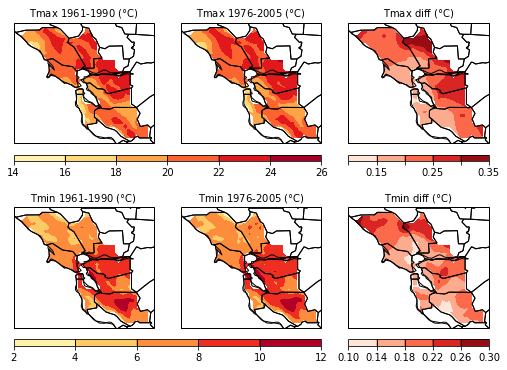

In [153]:
# Figure 6: SF Bay Area ----- (need to crop to standard domain)
fig6_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig6/'
tmax_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.early_period.nc', 'r')
tmax_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.late_period.nc', 'r')
tmax_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.diff_periods.nc', 'r')
tmin_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.early_period.nc', 'r')
tmin_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.late_period.nc', 'r')
tmin_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.diff_periods.nc', 'r')
pr_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.early_period.nc', 'r')
pr_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.late_period.nc', 'r')
pr_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.diff_periods.nc', 'r')

# The LOCA grids used in Fig 6 need to be trimmed to match the grids used in Figs 12 and 15
tmax_early = tmax_early_nc.variables['z'][2:175,0:169]
tmax_late = tmax_late_nc.variables['z'][2:175,0:169]
tmax_diff = tmax_diff_nc.variables['z'][2:175,0:169]
tmin_early = tmin_early_nc.variables['z'][2:175,0:169]
tmin_late = tmin_late_nc.variables['z'][2:175,0:169]
tmin_diff = tmin_diff_nc.variables['z'][2:175,0:169]
pr_early = pr_early_nc.variables['z'][2:175,0:169]
pr_late = pr_late_nc.variables['z'][2:175,0:169]
pr_diff = pr_diff_nc.variables['z'][2:175,0:169]

tmax_early_nc.close()
tmax_late_nc.close()
tmax_diff_nc.close()
tmin_early_nc.close()
tmin_late_nc.close()
tmin_diff_nc.close()
pr_early_nc.close()
pr_late_nc.close()
pr_diff_nc.close()

# Cut out the region
tmax_early_reg = np.ma.masked_where(region_arr!=region_code, tmax_early)
tmax_late_reg = np.ma.masked_where(region_arr!=region_code, tmax_late)
tmax_diff_reg = np.ma.masked_where(region_arr!=region_code, tmax_diff)
tmin_early_reg = np.ma.masked_where(region_arr!=region_code, tmin_early)
tmin_late_reg = np.ma.masked_where(region_arr!=region_code, tmin_late)
tmin_diff_reg = np.ma.masked_where(region_arr!=region_code, tmin_diff)
pr_early_reg = np.ma.masked_where(region_arr!=region_code, pr_early)
pr_late_reg = np.ma.masked_where(region_arr!=region_code, pr_late)
pr_diff_reg = np.ma.masked_where(region_arr!=region_code, pr_diff)

#print(np.min(tmin_early_reg), np.max(tmin_early_reg))
#print(np.min(tmin_late_reg), np.max(tmin_late_reg))
print(np.min(tmin_diff_reg), np.max(tmin_diff_reg))
#print(np.min(tmax_diff_reg), np.max(tmax_diff_reg))
# 9-panel plot 
fig = plt.figure(figsize=(7,6))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Tmax 1961-1990 '+'('+r'$\degree$'+'C)', fontsize=10)
#ax1.set_title('Pr 1961-1990 (mm/day)', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks12 = np.linspace(14,26,7, endpoint=True)
plot1 = ax1.contourf(lon, lat, tmax_early_reg, ticks12, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
#ax2.set_title('Pr 1976-2005 (mm/day)', fontsize=10)
ax2.set_title('Tmax 1976-2005 '+'('+r'$\degree$'+'C)', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, tmax_late_reg, ticks12, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('Tmax diff '+'('+r'$\degree$'+'C)', fontsize=10)
#ax3.set_title('Pr diff (mm/day)', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
ticks3 = np.linspace(.1,.35,6, endpoint=True)
plot3 = ax3.contourf(lon, lat, tmax_diff_reg, ticks3, transform=ccrs.PlateCarree(), cmap='Reds')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('Tmin 1961-1990 '+'('+r'$\degree$'+'C)', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
ticks45 = np.linspace(2,12,6, endpoint=True)
plot4 = ax4.contourf(lon, lat, tmin_early_reg, ticks45, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('Tmin 1976-2005 '+'('+r'$\degree$'+'C)', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, tmin_late_reg, ticks45, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('Tmin diff '+'('+r'$\degree$'+'C)', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
ticks6 = np.linspace(.1,.3,6, endpoint=True)
plot6 = ax6.contourf(lon, lat, tmin_diff_reg, ticks6, transform=ccrs.PlateCarree(), cmap='Reds')

fig.tight_layout(h_pad=-1, w_pad=2) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for panels 1 and 2 
cbar_ax12 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.08, ax2_pos.x1-ax1_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar12 = plt.colorbar(plot2,cax=cbar_ax12, ticks=ticks12, orientation='horizontal', drawedges=True)
cbar12.dividers.set_edgecolor('black')
cbar12.dividers.set_linewidth(1)

# Colorbar for panel 3
cbar_ax3 = fig.add_axes([ax3_pos.x0, ax3_pos.y0+0.08, ax3_pos.x1-ax3_pos.x0, cbar_height]) 
cbar3 = plt.colorbar(plot3, cax=cbar_ax3, ticks=ticks3, orientation='horizontal', drawedges=True)
cbar3.dividers.set_edgecolor('black')
cbar3.dividers.set_linewidth(1)
for label in cbar3.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

# Colorbar for panels 4 and 5 
cbar_ax45 = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.08, ax5_pos.x1-ax4_pos.x0, cbar_height]) 
cbar45 = plt.colorbar(plot5,cax=cbar_ax45, ticks=ticks45, orientation='horizontal', drawedges=True)
cbar45.dividers.set_edgecolor('black')
cbar45.dividers.set_linewidth(1)

# Colorbar for panel 6
cbar_ax6 = fig.add_axes([ax6_pos.x0, ax6_pos.y0+0.08, ax6_pos.x1-ax6_pos.x0, cbar_height]) 
cbar6 = plt.colorbar(plot6, cax=cbar_ax6, ticks=ticks6, orientation='horizontal', drawedges=True)
cbar6.dividers.set_edgecolor('black')
cbar6.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(bottom=0.5)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig6_SF_region_pt1.eps')
plt.show()

-1.98397 17.3155
-1.68154 17.5566


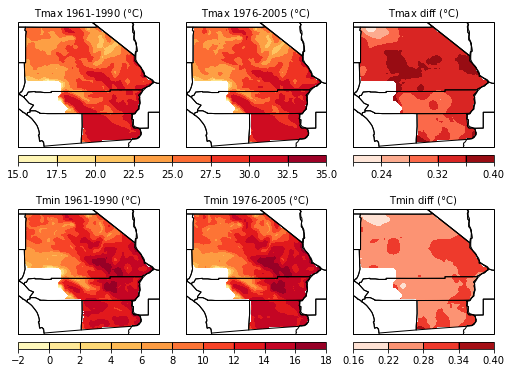

In [6]:
# Figure 6: Inland South Area ----- (need to crop to standard domain)
fig6_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig6/'
tmax_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.early_period.nc', 'r')
tmax_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.late_period.nc', 'r')
tmax_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.diff_periods.nc', 'r')
tmin_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.early_period.nc', 'r')
tmin_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.late_period.nc', 'r')
tmin_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.diff_periods.nc', 'r')
pr_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.early_period.nc', 'r')
pr_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.late_period.nc', 'r')
pr_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.diff_periods.nc', 'r')

# The LOCA grids used in Fig 6 need to be trimmed to match the grids used in Figs 12 and 15
tmax_early = tmax_early_nc.variables['z'][2:175,0:169]
tmax_late = tmax_late_nc.variables['z'][2:175,0:169]
tmax_diff = tmax_diff_nc.variables['z'][2:175,0:169]
tmin_early = tmin_early_nc.variables['z'][2:175,0:169]
tmin_late = tmin_late_nc.variables['z'][2:175,0:169]
tmin_diff = tmin_diff_nc.variables['z'][2:175,0:169]
pr_early = pr_early_nc.variables['z'][2:175,0:169]
pr_late = pr_late_nc.variables['z'][2:175,0:169]
pr_diff = pr_diff_nc.variables['z'][2:175,0:169]

tmax_early_nc.close()
tmax_late_nc.close()
tmax_diff_nc.close()
tmin_early_nc.close()
tmin_late_nc.close()
tmin_diff_nc.close()
pr_early_nc.close()
pr_late_nc.close()
pr_diff_nc.close()

# Cut out the region
tmax_early_reg = np.ma.masked_where(region_arr!=region_code, tmax_early)
tmax_late_reg = np.ma.masked_where(region_arr!=region_code, tmax_late)
tmax_diff_reg = np.ma.masked_where(region_arr!=region_code, tmax_diff)
tmin_early_reg = np.ma.masked_where(region_arr!=region_code, tmin_early)
tmin_late_reg = np.ma.masked_where(region_arr!=region_code, tmin_late)
tmin_diff_reg = np.ma.masked_where(region_arr!=region_code, tmin_diff)
pr_early_reg = np.ma.masked_where(region_arr!=region_code, pr_early)
pr_late_reg = np.ma.masked_where(region_arr!=region_code, pr_late)
pr_diff_reg = np.ma.masked_where(region_arr!=region_code, pr_diff)

print(np.min(tmin_early_reg), np.max(tmin_early_reg))
print(np.min(tmin_late_reg), np.max(tmin_late_reg))

#print(np.min(tmin_diff_reg), np.max(tmin_diff_reg))

# 9-panel plot 
fig = plt.figure(figsize=(7,6))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Tmax 1961-1990 '+'('+r'$\degree$'+'C)', fontsize=10)
#ax1.set_title('Pr 1961-1990 (mm/day)', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks12 = np.linspace(15,35,9, endpoint=True)
plot1 = ax1.contourf(lon, lat, tmax_early_reg, ticks12, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
#ax2.set_title('Pr 1976-2005 (mm/day)', fontsize=10)
ax2.set_title('Tmax 1976-2005 '+'('+r'$\degree$'+'C)', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, tmax_late_reg, ticks12, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('Tmax diff '+'('+r'$\degree$'+'C)', fontsize=10)
#ax3.set_title('Pr diff (mm/day)', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
ticks3 = np.linspace(.2,.4,6, endpoint=True)
plot3 = ax3.contourf(lon, lat, tmax_diff_reg, ticks3, transform=ccrs.PlateCarree(), cmap='Reds')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('Tmin 1961-1990 '+'('+r'$\degree$'+'C)', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
ticks45 = np.linspace(-2,18,11, endpoint=True)
plot4 = ax4.contourf(lon, lat, tmin_early_reg, ticks45, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('Tmin 1976-2005 '+'('+r'$\degree$'+'C)', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, tmin_late_reg, ticks45, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('Tmin diff '+'('+r'$\degree$'+'C)', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
ticks6 = np.linspace(.16,.40,5, endpoint=True)
plot6 = ax6.contourf(lon, lat, tmin_diff_reg, ticks6, transform=ccrs.PlateCarree(), cmap='Reds')

fig.tight_layout(h_pad=-1, w_pad=2) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for panels 1 and 2 
cbar_ax12 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.08, ax2_pos.x1-ax1_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar12 = plt.colorbar(plot2,cax=cbar_ax12, ticks=ticks12, orientation='horizontal', drawedges=True)
cbar12.dividers.set_edgecolor('black')
cbar12.dividers.set_linewidth(1)

# Colorbar for panel 3
cbar_ax3 = fig.add_axes([ax3_pos.x0, ax3_pos.y0+0.08, ax3_pos.x1-ax3_pos.x0, cbar_height]) 
cbar3 = plt.colorbar(plot3, cax=cbar_ax3, ticks=ticks3, orientation='horizontal', drawedges=True)
#cbar3 = plt.colorbar(plot3, cax=cbar_ax3, orientation='horizontal', drawedges=True)
cbar3.dividers.set_edgecolor('black')
cbar3.dividers.set_linewidth(1)
for label in cbar3.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

# Colorbar for panels 4 and 5 
cbar_ax45 = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.08, ax5_pos.x1-ax4_pos.x0, cbar_height]) 
cbar45 = plt.colorbar(plot5,cax=cbar_ax45, ticks=ticks45, orientation='horizontal', drawedges=True)
cbar45.dividers.set_edgecolor('black')
cbar45.dividers.set_linewidth(1)

# Colorbar for panel 6
cbar_ax6 = fig.add_axes([ax6_pos.x0, ax6_pos.y0+0.08, ax6_pos.x1-ax6_pos.x0, cbar_height]) 
cbar6 = plt.colorbar(plot6, cax=cbar_ax6, ticks=ticks6, orientation='horizontal', drawedges=True)
cbar6.dividers.set_edgecolor('black')
cbar6.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(bottom=0.5)
#plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig6_IS_region_pt1.eps')
plt.show()

0.118019 0.37533


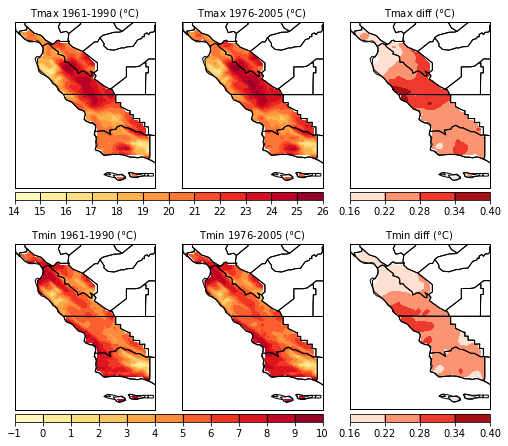

In [24]:
# Figure 6: Central Coast Area ----- (need to crop to standard domain)
fig6_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig6/'
tmax_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.early_period.nc', 'r')
tmax_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.late_period.nc', 'r')
tmax_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmax.diff_periods.nc', 'r')
tmin_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.early_period.nc', 'r')
tmin_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.late_period.nc', 'r')
tmin_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.tasmin.diff_periods.nc', 'r')
pr_early_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.early_period.nc', 'r')
pr_late_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.late_period.nc', 'r')
pr_diff_nc = netCDF4.Dataset(fig6_dir+'climo_period_effect_v3.R.pr.diff_periods.nc', 'r')

# The LOCA grids used in Fig 6 need to be trimmed to match the grids used in Figs 12 and 15
tmax_early = tmax_early_nc.variables['z'][2:175,0:169]
tmax_late = tmax_late_nc.variables['z'][2:175,0:169]
tmax_diff = tmax_diff_nc.variables['z'][2:175,0:169]
tmin_early = tmin_early_nc.variables['z'][2:175,0:169]
tmin_late = tmin_late_nc.variables['z'][2:175,0:169]
tmin_diff = tmin_diff_nc.variables['z'][2:175,0:169]
pr_early = pr_early_nc.variables['z'][2:175,0:169]
pr_late = pr_late_nc.variables['z'][2:175,0:169]
pr_diff = pr_diff_nc.variables['z'][2:175,0:169]

tmax_early_nc.close()
tmax_late_nc.close()
tmax_diff_nc.close()
tmin_early_nc.close()
tmin_late_nc.close()
tmin_diff_nc.close()
pr_early_nc.close()
pr_late_nc.close()
pr_diff_nc.close()

# Cut out the region
tmax_early_reg = np.ma.masked_where(region_arr!=region_code, tmax_early)
tmax_late_reg = np.ma.masked_where(region_arr!=region_code, tmax_late)
tmax_diff_reg = np.ma.masked_where(region_arr!=region_code, tmax_diff)
tmin_early_reg = np.ma.masked_where(region_arr!=region_code, tmin_early)
tmin_late_reg = np.ma.masked_where(region_arr!=region_code, tmin_late)
tmin_diff_reg = np.ma.masked_where(region_arr!=region_code, tmin_diff)
pr_early_reg = np.ma.masked_where(region_arr!=region_code, pr_early)
pr_late_reg = np.ma.masked_where(region_arr!=region_code, pr_late)
pr_diff_reg = np.ma.masked_where(region_arr!=region_code, pr_diff)

#print(np.min(tmin_early_reg), np.max(tmin_early_reg))
#print(np.min(tmin_late_reg), np.max(tmin_late_reg))

print(np.min(tmax_diff_reg), np.max(tmax_diff_reg))

# 9-panel plot 
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Tmax 1961-1990 '+'('+r'$\degree$'+'C)', fontsize=10)
#ax1.set_title('Pr 1961-1990 (mm/day)', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks12 = np.linspace(14,26,13, endpoint=True)
plot1 = ax1.contourf(lon, lat, tmax_early_reg, ticks12, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
#ax2.set_title('Pr 1976-2005 (mm/day)', fontsize=10)
ax2.set_title('Tmax 1976-2005 '+'('+r'$\degree$'+'C)', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, tmax_late_reg, ticks12, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('Tmax diff '+'('+r'$\degree$'+'C)', fontsize=10)
#ax3.set_title('Pr diff (mm/day)', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
ticks3 = np.linspace(.16,.40,5, endpoint=True)
plot3 = ax3.contourf(lon, lat, tmax_diff_reg, ticks3, transform=ccrs.PlateCarree(), cmap='Reds')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('Tmin 1961-1990 '+'('+r'$\degree$'+'C)', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
ticks45 = np.linspace(-1,10,12, endpoint=True)
plot4 = ax4.contourf(lon, lat, tmin_early_reg, ticks45, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('Tmin 1976-2005 '+'('+r'$\degree$'+'C)', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, tmin_late_reg, ticks45, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('Tmin diff '+'('+r'$\degree$'+'C)', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
ticks6 = np.linspace(.16,.40,5, endpoint=True)
plot6 = ax6.contourf(lon, lat, tmin_diff_reg, ticks6, transform=ccrs.PlateCarree(), cmap='Reds')

fig.tight_layout(h_pad=-2, w_pad=2) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Colorbar for panels 1 and 2 
cbar_ax12 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.07, ax2_pos.x1-ax1_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar12 = plt.colorbar(plot2,cax=cbar_ax12, ticks=ticks12, orientation='horizontal', drawedges=True)
cbar12.dividers.set_edgecolor('black')
cbar12.dividers.set_linewidth(1)

# Colorbar for panel 3
cbar_ax3 = fig.add_axes([ax3_pos.x0, ax3_pos.y0+0.07, ax3_pos.x1-ax3_pos.x0, cbar_height]) 
cbar3 = plt.colorbar(plot3, cax=cbar_ax3, ticks=ticks3, orientation='horizontal', drawedges=True)
#cbar3 = plt.colorbar(plot3, cax=cbar_ax3, orientation='horizontal', drawedges=True)
cbar3.dividers.set_edgecolor('black')
cbar3.dividers.set_linewidth(1)
#for label in cbar3.ax.xaxis.get_ticklabels()[::2]:
#    label.set_visible(False)

# Colorbar for panels 4 and 5 
cbar_ax45 = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.07, ax5_pos.x1-ax4_pos.x0, cbar_height]) 
cbar45 = plt.colorbar(plot5,cax=cbar_ax45, ticks=ticks45, orientation='horizontal', drawedges=True)
cbar45.dividers.set_edgecolor('black')
cbar45.dividers.set_linewidth(1)

# Colorbar for panel 6
cbar_ax6 = fig.add_axes([ax6_pos.x0, ax6_pos.y0+0.07, ax6_pos.x1-ax6_pos.x0, cbar_height]) 
cbar6 = plt.colorbar(plot6, cax=cbar_ax6, ticks=ticks6, orientation='horizontal', drawedges=True)
cbar6.dividers.set_edgecolor('black')
cbar6.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(bottom=0.5)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig6_CC_region_pt1.eps')
plt.show()

# Figure 8 (Future annual mean temperature change)
- Change `fig8_dir` to the directory where you have saved the netCDF files
- Change start/end/number ticks in `plot_ticks = np.linspace(1,10,10, endpoint=True)`
- Change `h_pad` and/or `w_pad` in `fig.tight_layout(h_pad=-13)`

1.35658 9.29688


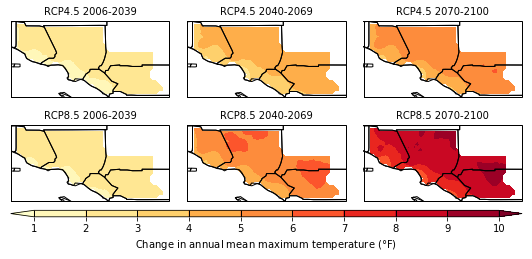

In [5]:
# Figure 8 LA REGION 
fig8_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig8_new/'
tmax_rcp45_2006_2039_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2006-2039.nc', 'r')
tmax_rcp45_2040_2069_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2040-2069.nc', 'r')
tmax_rcp45_2070_2100_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2070-2100.nc', 'r')
tmax_rcp85_2006_2039_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2006-2039.nc', 'r')
tmax_rcp85_2040_2069_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2040-2069.nc', 'r')
tmax_rcp85_2070_2100_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2070-2100.nc', 'r')

tmax_rcp45_2006_2039 = tmax_rcp45_2006_2039_nc.variables['z'][:,:]
tmax_rcp45_2040_2069 = tmax_rcp45_2040_2069_nc.variables['z'][:,:]
tmax_rcp45_2070_2100 = tmax_rcp45_2070_2100_nc.variables['z'][:,:]
tmax_rcp85_2006_2039 = tmax_rcp85_2006_2039_nc.variables['z'][:,:]
tmax_rcp85_2040_2069 = tmax_rcp85_2040_2069_nc.variables['z'][:,:]
tmax_rcp85_2070_2100 = tmax_rcp85_2070_2100_nc.variables['z'][:,:]

tmax_rcp45_2006_2039_nc.close()
tmax_rcp45_2040_2069_nc.close()
tmax_rcp45_2070_2100_nc.close()
tmax_rcp85_2006_2039_nc.close()
tmax_rcp85_2040_2069_nc.close()
tmax_rcp85_2070_2100_nc.close()

# Cut out the region
tmax_rcp45_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2006_2039)
tmax_rcp45_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2040_2069)
tmax_rcp45_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2070_2100)
tmax_rcp85_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2006_2039)
tmax_rcp85_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2040_2069)
tmax_rcp85_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2070_2100)

# Convert from change in deg C to change in deg F
tmax_rcp45_2006_2039_reg_F = tmax_rcp45_2006_2039_reg * 1.8
tmax_rcp45_2040_2069_reg_F = tmax_rcp45_2040_2069_reg * 1.8
tmax_rcp45_2070_2100_reg_F = tmax_rcp45_2070_2100_reg * 1.8
tmax_rcp85_2006_2039_reg_F = tmax_rcp85_2006_2039_reg * 1.8
tmax_rcp85_2040_2069_reg_F = tmax_rcp85_2040_2069_reg * 1.8
tmax_rcp85_2070_2100_reg_F = tmax_rcp85_2070_2100_reg * 1.8

print(np.min(tmax_rcp45_2006_2039_reg_F), np.max(tmax_rcp85_2070_2100_reg_F))

#6-panel plot 
plot_ticks = np.linspace(1,10,10, endpoint=True)

fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('RCP4.5 2006-2039', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, tmax_rcp45_2006_2039_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd', extend='both')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2040-2069', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, tmax_rcp45_2040_2069_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd', extend='both')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP4.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, tmax_rcp45_2070_2100_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd', extend='both')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('RCP8.5 2006-2039', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, tmax_rcp85_2006_2039_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd', extend='both')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP8.5 2040-2069', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, tmax_rcp85_2040_2069_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd', extend='both')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 2070-2100', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, tmax_rcp85_2070_2100_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd', extend='both')

fig.tight_layout(h_pad=-13) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Single colorbar for all panels
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.23, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar = plt.colorbar(plot6, cax=cbar_ax, orientation='horizontal', ticks=plot_ticks, drawedges=True, extend='both')
cbar.set_label('Change in annual mean maximum temperature '+'('+r'$\degree$'+'F)', fontsize=10)
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig8_LA_region.eps', dpi=300)
plt.show()

1.02565 10.2608


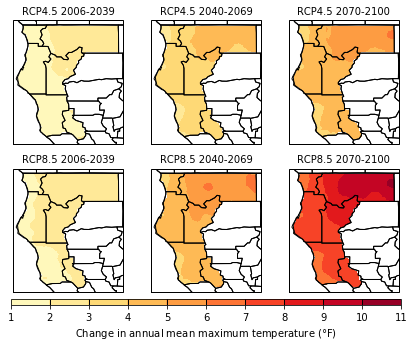

In [13]:
# Figure 8 NORTH COAST ----- (need to crop to standard domain)
fig8_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig8_new/'
tmax_rcp45_2006_2039_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2006-2039.nc', 'r')
tmax_rcp45_2040_2069_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2040-2069.nc', 'r')
tmax_rcp45_2070_2100_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2070-2100.nc', 'r')
tmax_rcp85_2006_2039_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2006-2039.nc', 'r')
tmax_rcp85_2040_2069_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2040-2069.nc', 'r')
tmax_rcp85_2070_2100_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2070-2100.nc', 'r')

tmax_rcp45_2006_2039 = tmax_rcp45_2006_2039_nc.variables['z'][:,:]
tmax_rcp45_2040_2069 = tmax_rcp45_2040_2069_nc.variables['z'][:,:]
tmax_rcp45_2070_2100 = tmax_rcp45_2070_2100_nc.variables['z'][:,:]
tmax_rcp85_2006_2039 = tmax_rcp85_2006_2039_nc.variables['z'][:,:]
tmax_rcp85_2040_2069 = tmax_rcp85_2040_2069_nc.variables['z'][:,:]
tmax_rcp85_2070_2100 = tmax_rcp85_2070_2100_nc.variables['z'][:,:]

tmax_rcp45_2006_2039_nc.close()
tmax_rcp45_2040_2069_nc.close()
tmax_rcp45_2070_2100_nc.close()
tmax_rcp85_2006_2039_nc.close()
tmax_rcp85_2040_2069_nc.close()
tmax_rcp85_2070_2100_nc.close()

# Cut out the region
tmax_rcp45_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2006_2039)
tmax_rcp45_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2040_2069)
tmax_rcp45_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2070_2100)
tmax_rcp85_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2006_2039)
tmax_rcp85_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2040_2069)
tmax_rcp85_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2070_2100)

# Convert from change in deg C to change in deg F
tmax_rcp45_2006_2039_reg_F = tmax_rcp45_2006_2039_reg * 1.8
tmax_rcp45_2040_2069_reg_F = tmax_rcp45_2040_2069_reg * 1.8
tmax_rcp45_2070_2100_reg_F = tmax_rcp45_2070_2100_reg * 1.8
tmax_rcp85_2006_2039_reg_F = tmax_rcp85_2006_2039_reg * 1.8
tmax_rcp85_2040_2069_reg_F = tmax_rcp85_2040_2069_reg * 1.8
tmax_rcp85_2070_2100_reg_F = tmax_rcp85_2070_2100_reg * 1.8

#6-panel plot 
print(np.min(tmax_rcp45_2006_2039_reg_F), np.max(tmax_rcp85_2070_2100_reg_F))

plot_ticks = np.linspace(1,11,11, endpoint=True)

fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('RCP4.5 2006-2039', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, tmax_rcp45_2006_2039_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2040-2069', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, tmax_rcp45_2040_2069_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP4.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, tmax_rcp45_2070_2100_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('RCP8.5 2006-2039', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, tmax_rcp85_2006_2039_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP8.5 2040-2069', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, tmax_rcp85_2040_2069_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 2070-2100', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, tmax_rcp85_2070_2100_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

#fig.tight_layout(h_pad=-3) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Single colorbar for all panels
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0-0.035, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar = plt.colorbar(plot6, cax=cbar_ax, orientation='horizontal', ticks=plot_ticks, drawedges=True)
cbar.set_label('Change in annual mean maximum temperature '+'('+r'$\degree$'+'F)', fontsize=10)
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig8_NC_region.eps')
plt.show()

1.13599 8.11683


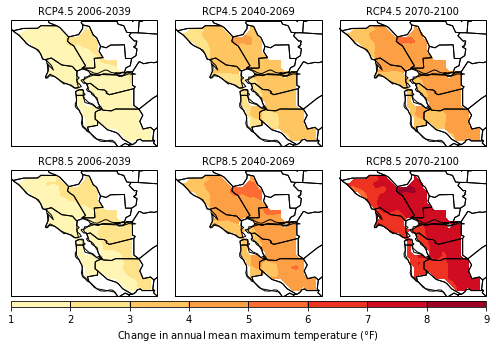

In [17]:
# Figure 8 SF BAY
fig8_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig8_new/'
tmax_rcp45_2006_2039_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2006-2039.nc', 'r')
tmax_rcp45_2040_2069_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2040-2069.nc', 'r')
tmax_rcp45_2070_2100_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2070-2100.nc', 'r')
tmax_rcp85_2006_2039_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2006-2039.nc', 'r')
tmax_rcp85_2040_2069_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2040-2069.nc', 'r')
tmax_rcp85_2070_2100_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2070-2100.nc', 'r')

tmax_rcp45_2006_2039 = tmax_rcp45_2006_2039_nc.variables['z'][:,:]
tmax_rcp45_2040_2069 = tmax_rcp45_2040_2069_nc.variables['z'][:,:]
tmax_rcp45_2070_2100 = tmax_rcp45_2070_2100_nc.variables['z'][:,:]
tmax_rcp85_2006_2039 = tmax_rcp85_2006_2039_nc.variables['z'][:,:]
tmax_rcp85_2040_2069 = tmax_rcp85_2040_2069_nc.variables['z'][:,:]
tmax_rcp85_2070_2100 = tmax_rcp85_2070_2100_nc.variables['z'][:,:]

tmax_rcp45_2006_2039_nc.close()
tmax_rcp45_2040_2069_nc.close()
tmax_rcp45_2070_2100_nc.close()
tmax_rcp85_2006_2039_nc.close()
tmax_rcp85_2040_2069_nc.close()
tmax_rcp85_2070_2100_nc.close()

# Cut out the region
tmax_rcp45_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2006_2039)
tmax_rcp45_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2040_2069)
tmax_rcp45_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2070_2100)
tmax_rcp85_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2006_2039)
tmax_rcp85_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2040_2069)
tmax_rcp85_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2070_2100)

# Convert from change in deg C to change in deg F
tmax_rcp45_2006_2039_reg_F = tmax_rcp45_2006_2039_reg * 1.8
tmax_rcp45_2040_2069_reg_F = tmax_rcp45_2040_2069_reg * 1.8
tmax_rcp45_2070_2100_reg_F = tmax_rcp45_2070_2100_reg * 1.8
tmax_rcp85_2006_2039_reg_F = tmax_rcp85_2006_2039_reg * 1.8
tmax_rcp85_2040_2069_reg_F = tmax_rcp85_2040_2069_reg * 1.8
tmax_rcp85_2070_2100_reg_F = tmax_rcp85_2070_2100_reg * 1.8

#6-panel plot 
print(np.min(tmax_rcp45_2006_2039_reg_F), np.max(tmax_rcp85_2070_2100_reg_F))
#print(np.min(tmax_rcp45_2020_2039_reg), np.min(tmax_rcp45_2040_2069_reg), np.min(tmax_rcp45_2070_2100_reg))
#print(np.min(tmax_rcp85_2020_2039_reg), np.min(tmax_rcp85_2040_2069_reg), np.min(tmax_rcp85_2070_2100_reg))

plot_ticks = np.linspace(1,9,9, endpoint=True)

fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('RCP4.5 2006-2039', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, tmax_rcp45_2006_2039_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2040-2069', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, tmax_rcp45_2040_2069_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP4.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, tmax_rcp45_2070_2100_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('RCP8.5 2006-2039', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, tmax_rcp85_2006_2039_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP8.5 2040-2069', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, tmax_rcp85_2040_2069_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 2070-2100', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, tmax_rcp85_2070_2100_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

fig.tight_layout(h_pad=-3) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Single colorbar for all panels
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.055, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar = plt.colorbar(plot6, cax=cbar_ax, orientation='horizontal', ticks=plot_ticks, drawedges=True)
cbar.set_label('Change in annual mean maximum temperature '+'('+r'$\degree$'+'F)', fontsize=10)
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig8_SF_region.eps')
plt.show()

1.90048 9.46882


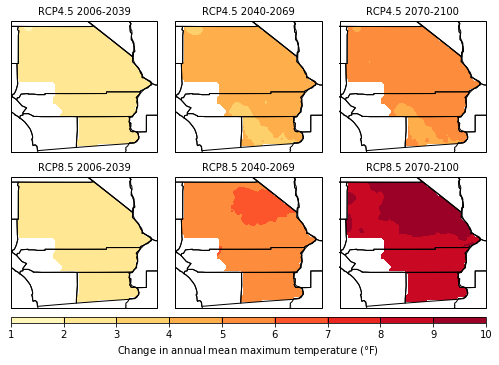

In [22]:
# Figure 8 Inland South 
fig8_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig8_new/'
tmax_rcp45_2006_2039_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2006-2039.nc', 'r')
tmax_rcp45_2040_2069_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2040-2069.nc', 'r')
tmax_rcp45_2070_2100_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2070-2100.nc', 'r')
tmax_rcp85_2006_2039_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2006-2039.nc', 'r')
tmax_rcp85_2040_2069_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2040-2069.nc', 'r')
tmax_rcp85_2070_2100_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2070-2100.nc', 'r')

tmax_rcp45_2006_2039 = tmax_rcp45_2006_2039_nc.variables['z'][:,:]
tmax_rcp45_2040_2069 = tmax_rcp45_2040_2069_nc.variables['z'][:,:]
tmax_rcp45_2070_2100 = tmax_rcp45_2070_2100_nc.variables['z'][:,:]
tmax_rcp85_2006_2039 = tmax_rcp85_2006_2039_nc.variables['z'][:,:]
tmax_rcp85_2040_2069 = tmax_rcp85_2040_2069_nc.variables['z'][:,:]
tmax_rcp85_2070_2100 = tmax_rcp85_2070_2100_nc.variables['z'][:,:]

tmax_rcp45_2006_2039_nc.close()
tmax_rcp45_2040_2069_nc.close()
tmax_rcp45_2070_2100_nc.close()
tmax_rcp85_2006_2039_nc.close()
tmax_rcp85_2040_2069_nc.close()
tmax_rcp85_2070_2100_nc.close()

# Cut out the region
tmax_rcp45_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2006_2039)
tmax_rcp45_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2040_2069)
tmax_rcp45_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2070_2100)
tmax_rcp85_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2006_2039)
tmax_rcp85_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2040_2069)
tmax_rcp85_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2070_2100)

# Convert from change in deg C to change in deg F
tmax_rcp45_2006_2039_reg_F = tmax_rcp45_2006_2039_reg * 1.8
tmax_rcp45_2040_2069_reg_F = tmax_rcp45_2040_2069_reg * 1.8
tmax_rcp45_2070_2100_reg_F = tmax_rcp45_2070_2100_reg * 1.8
tmax_rcp85_2006_2039_reg_F = tmax_rcp85_2006_2039_reg * 1.8
tmax_rcp85_2040_2069_reg_F = tmax_rcp85_2040_2069_reg * 1.8
tmax_rcp85_2070_2100_reg_F = tmax_rcp85_2070_2100_reg * 1.8

#6-panel plot 
print(np.min(tmax_rcp45_2006_2039_reg_F), np.max(tmax_rcp85_2070_2100_reg_F))
#print(np.min(tmax_rcp45_2020_2039_reg), np.min(tmax_rcp45_2040_2069_reg), np.min(tmax_rcp45_2070_2100_reg))
#print(np.min(tmax_rcp85_2020_2039_reg), np.min(tmax_rcp85_2040_2069_reg), np.min(tmax_rcp85_2070_2100_reg))
#print(np.max(tmax_rcp45_2020_2039_reg), np.max(tmax_rcp45_2040_2069_reg), np.max(tmax_rcp45_2070_2100_reg))
#print(np.max(tmax_rcp85_2020_2039_reg), np.max(tmax_rcp85_2040_2069_reg), np.max(tmax_rcp85_2070_2100_reg))

plot_ticks = np.linspace(1,10,10, endpoint=True)

fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('RCP4.5 2006-2039', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, tmax_rcp45_2006_2039_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2040-2069', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, tmax_rcp45_2040_2069_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP4.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, tmax_rcp45_2070_2100_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('RCP8.5 2006-2039', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, tmax_rcp85_2006_2039_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP8.5 2040-2069', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, tmax_rcp85_2040_2069_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 2070-2100', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, tmax_rcp85_2070_2100_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

fig.tight_layout(h_pad=-2) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Single colorbar for all panels
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.025, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar = plt.colorbar(plot6, cax=cbar_ax, orientation='horizontal', ticks=plot_ticks, drawedges=True)
cbar.set_label('Change in annual mean maximum temperature '+'('+r'$\degree$'+'F)', fontsize=10)
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig8_IS_region.eps')
plt.show()

1.08712 8.46696


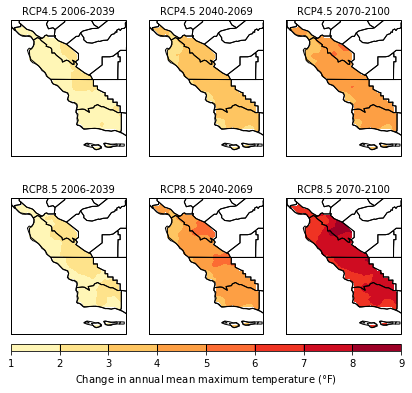

In [25]:
# Figure 8 Central Coast
fig8_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig8_new/'
tmax_rcp45_2006_2039_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2006-2039.nc', 'r')
tmax_rcp45_2040_2069_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2040-2069.nc', 'r')
tmax_rcp45_2070_2100_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp45.2070-2100.nc', 'r')
tmax_rcp85_2006_2039_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2006-2039.nc', 'r')
tmax_rcp85_2040_2069_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2040-2069.nc', 'r')
tmax_rcp85_2070_2100_nc = netCDF4.Dataset(fig8_dir+'Pierce_et_al_scenarios_2018-07-09_fig08.rcp85.2070-2100.nc', 'r')

tmax_rcp45_2006_2039 = tmax_rcp45_2006_2039_nc.variables['z'][:,:]
tmax_rcp45_2040_2069 = tmax_rcp45_2040_2069_nc.variables['z'][:,:]
tmax_rcp45_2070_2100 = tmax_rcp45_2070_2100_nc.variables['z'][:,:]
tmax_rcp85_2006_2039 = tmax_rcp85_2006_2039_nc.variables['z'][:,:]
tmax_rcp85_2040_2069 = tmax_rcp85_2040_2069_nc.variables['z'][:,:]
tmax_rcp85_2070_2100 = tmax_rcp85_2070_2100_nc.variables['z'][:,:]

tmax_rcp45_2006_2039_nc.close()
tmax_rcp45_2040_2069_nc.close()
tmax_rcp45_2070_2100_nc.close()
tmax_rcp85_2006_2039_nc.close()
tmax_rcp85_2040_2069_nc.close()
tmax_rcp85_2070_2100_nc.close()

# Cut out the region
tmax_rcp45_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2006_2039)
tmax_rcp45_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2040_2069)
tmax_rcp45_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp45_2070_2100)
tmax_rcp85_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2006_2039)
tmax_rcp85_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2040_2069)
tmax_rcp85_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, tmax_rcp85_2070_2100)

# Convert from change in deg C to change in deg F
tmax_rcp45_2006_2039_reg_F = tmax_rcp45_2006_2039_reg * 1.8
tmax_rcp45_2040_2069_reg_F = tmax_rcp45_2040_2069_reg * 1.8
tmax_rcp45_2070_2100_reg_F = tmax_rcp45_2070_2100_reg * 1.8
tmax_rcp85_2006_2039_reg_F = tmax_rcp85_2006_2039_reg * 1.8
tmax_rcp85_2040_2069_reg_F = tmax_rcp85_2040_2069_reg * 1.8
tmax_rcp85_2070_2100_reg_F = tmax_rcp85_2070_2100_reg * 1.8

#6-panel plot 
print(np.min(tmax_rcp45_2006_2039_reg_F), np.max(tmax_rcp85_2070_2100_reg_F))
#print(np.min(tmax_rcp45_2020_2039_reg), np.min(tmax_rcp45_2040_2069_reg), np.min(tmax_rcp45_2070_2100_reg))
#print(np.min(tmax_rcp85_2020_2039_reg), np.min(tmax_rcp85_2040_2069_reg), np.min(tmax_rcp85_2070_2100_reg))
#print(np.max(tmax_rcp45_2020_2039_reg), np.max(tmax_rcp45_2040_2069_reg), np.max(tmax_rcp45_2070_2100_reg))
#print(np.max(tmax_rcp85_2020_2039_reg), np.max(tmax_rcp85_2040_2069_reg), np.max(tmax_rcp85_2070_2100_reg))

plot_ticks = np.linspace(1,9,9, endpoint=True)

fig = plt.figure(figsize=(7,6))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('RCP4.5 2006-2039', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, tmax_rcp45_2006_2039_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2040-2069', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, tmax_rcp45_2040_2069_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP4.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, tmax_rcp45_2070_2100_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('RCP8.5 2006-2039', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, tmax_rcp85_2006_2039_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP8.5 2040-2069', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, tmax_rcp85_2040_2069_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 2070-2100', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, tmax_rcp85_2070_2100_reg_F, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlOrRd')

#fig.tight_layout(h_pad=-2) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Single colorbar for all panels
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0-0.025, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar = plt.colorbar(plot6, cax=cbar_ax, orientation='horizontal', ticks=plot_ticks, drawedges=True)
cbar.set_label('Change in annual mean maximum temperature '+'('+r'$\degree$'+'F)', fontsize=10)
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(bottom=0.05)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig8_CC_region.eps')
plt.show()

# Figure 9 (Hottest day of the year)
- Change `fig9_dir` to wherever you have saved the netCDF files
- Change start/end/number ticks in `ticks123 = np.linspace(75,125,11, endpoint=True)` 
- Change start/end/number tickets in `ticks56 = np.linspace(4,12,9, endpoint=True)`
- Change `h_pad` and/or `w_pad` in `fig.tight_layout(h_pad=4.5)`

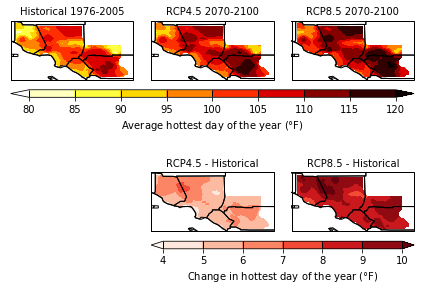

In [7]:
# LA REGION 
# Figure 9
fig9_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig9_new/'
hist_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.historical.1976-2005.abs.nc', 'r')
rcp45_end_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.rcp45.2070-2100.abs.nc', 'r')
rcp85_end_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.rcp85.2070-2100.abs.nc', 'r')

hist_hottest_day = hist_hottest_day_nc.variables['max_temp_historical_1976-2005'][:,:]
rcp45_end_hottest_day = rcp45_end_hottest_day_nc.variables['max_temp_rcp45_2070-2100'][:,:]
rcp85_end_hottest_day = rcp85_end_hottest_day_nc.variables['max_temp_rcp85_2070-2100'][:,:]

# Convert from C to F
hist_hottest_day = (hist_hottest_day * (9/5)) + 32
rcp45_end_hottest_day = (rcp45_end_hottest_day * (9/5)) + 32
rcp85_end_hottest_day = (rcp85_end_hottest_day * (9/5)) + 32

# Calculate changes 
rcp45_change_hottest_day = rcp45_end_hottest_day - hist_hottest_day
rcp85_change_hottest_day = rcp85_end_hottest_day - hist_hottest_day

hist_hottest_day_nc.close()
rcp45_end_hottest_day_nc.close()
rcp85_end_hottest_day_nc.close()

# Cut out the region
hist_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, hist_hottest_day)
rcp45_end_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_end_hottest_day)
rcp85_end_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_end_hottest_day)
rcp45_change_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_change_hottest_day)
rcp85_change_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_change_hottest_day)

#print(np.min(rcp85_change_hottest_day_reg), np.max(rcp85_change_hottest_day_reg))


# 5-panel plot
# Colorbar specifications
cbar_height = 0.015

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Historical 1976-2005', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks123 = np.linspace(80,120,9, endpoint=True)
plot1 = ax1.contourf(lon, lat, hist_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')

ax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2070-2100', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, rcp45_end_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')

ax3 = fig.add_subplot(2,3,3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP8.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, rcp85_end_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')

ax5 = fig.add_subplot(2,3,5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP4.5 - Historical', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
ticks56 = np.linspace(4,10,7, endpoint=True)
plot5 = ax5.contourf(lon, lat, rcp45_change_hottest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Reds', extend='both')

ax6 = fig.add_subplot(2,3,6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 - Historical', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, rcp85_change_hottest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Reds', extend='both')

fig.tight_layout(h_pad=-12)

# Get subplot positions
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

cbar_ax123 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.235, ax3_pos.x1-ax1_pos.x0, cbar_height]) 
cbar123 = plt.colorbar(plot3, cax=cbar_ax123, orientation='horizontal', ticks=ticks123, drawedges=True, extend='both')
cbar123.dividers.set_edgecolor('black')
cbar123.dividers.set_linewidth(1)
cbar123.set_label('Average hottest day of the year '+'('+r'$\degree$'+'F)')

cbar_ax56 = fig.add_axes([ax5_pos.x0, ax5_pos.y0+0.235, ax6_pos.x1-ax5_pos.x0, cbar_height])
cbar56 = plt.colorbar(plot6, cax=cbar_ax56, orientation='horizontal', ticks=ticks56, drawedges=True, extend='both')
cbar56.dividers.set_edgecolor('black')
cbar56.dividers.set_linewidth(1)
cbar56.set_label('Change in hottest day of the year '+'('+r'$\degree$'+'F)')

plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig9_LA_region.eps')
plt.show()

71.8211 117.635


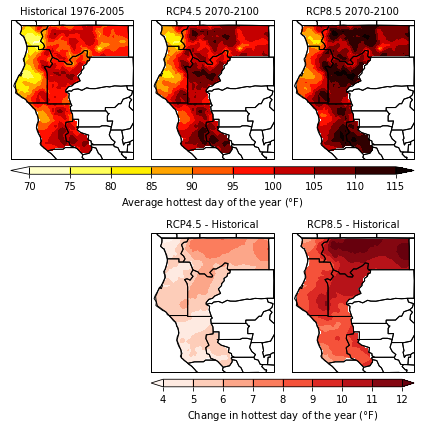

In [135]:
# Figure 9 NORTH COAST
fig9_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig9_new/'
hist_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.historical.1976-2005.abs.nc', 'r')
rcp45_end_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.rcp45.2070-2100.abs.nc', 'r')
rcp85_end_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.rcp85.2070-2100.abs.nc', 'r')

hist_hottest_day = hist_hottest_day_nc.variables['max_temp_historical_1976-2005'][:,:]
rcp45_end_hottest_day = rcp45_end_hottest_day_nc.variables['max_temp_rcp45_2070-2100'][:,:]
rcp85_end_hottest_day = rcp85_end_hottest_day_nc.variables['max_temp_rcp85_2070-2100'][:,:]

# Convert from C to F
hist_hottest_day = (hist_hottest_day * (9/5)) + 32
rcp45_end_hottest_day = (rcp45_end_hottest_day * (9/5)) + 32
rcp85_end_hottest_day = (rcp85_end_hottest_day * (9/5)) + 32

# Calculate changes 
rcp45_change_hottest_day = rcp45_end_hottest_day - hist_hottest_day
rcp85_change_hottest_day = rcp85_end_hottest_day - hist_hottest_day

hist_hottest_day_nc.close()
rcp45_end_hottest_day_nc.close()
rcp85_end_hottest_day_nc.close()

# Cut out the region
hist_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, hist_hottest_day)
rcp45_end_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_end_hottest_day)
rcp85_end_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_end_hottest_day)
rcp45_change_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_change_hottest_day)
rcp85_change_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_change_hottest_day)

print(np.min(hist_hottest_day_reg), np.max(rcp85_end_hottest_day_reg))

# 5-panel plot
# Colorbar specifications
cbar_height = 0.015

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Historical 1976-2005', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks123 = np.linspace(70,115,10, endpoint=True)
plot1 = ax1.contourf(lon, lat, hist_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')

ax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2070-2100', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, rcp45_end_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')

ax3 = fig.add_subplot(2,3,3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP8.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, rcp85_end_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r', extend='both')

ax5 = fig.add_subplot(2,3,5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP4.5 - Historical', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
ticks56 = np.linspace(4,12,9, endpoint=True)
plot5 = ax5.contourf(lon, lat, rcp45_change_hottest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Reds', extend='both')

ax6 = fig.add_subplot(2,3,6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 - Historical', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, rcp85_change_hottest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Reds', extend='both')

fig.tight_layout(h_pad=-3)

# Get subplot positions
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

cbar_ax123 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.1, ax3_pos.x1-ax1_pos.x0, cbar_height]) 
cbar123 = plt.colorbar(plot3, cax=cbar_ax123, ticks=ticks123, orientation='horizontal', drawedges=True, extend='both')
cbar123.dividers.set_edgecolor('black')
cbar123.dividers.set_linewidth(1)
cbar123.set_label('Average hottest day of the year '+'('+r'$\degree$'+'F)')

cbar_ax56 = fig.add_axes([ax5_pos.x0, ax5_pos.y0+0.1, ax6_pos.x1-ax5_pos.x0, cbar_height])
cbar56 = plt.colorbar(plot6, cax=cbar_ax56, ticks=ticks56, orientation='horizontal', drawedges=True, extend='both')
cbar56.dividers.set_edgecolor('black')
cbar56.dividers.set_linewidth(1)
cbar56.set_label('Change in hottest day of the year '+'('+r'$\degree$'+'F)')

plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig9_NC_region.eps')
plt.show()

6.28329 9.98274


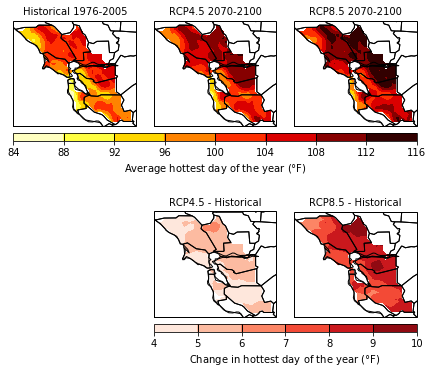

In [15]:
# Figure 9 SF BAY ----- (need to crop to standard domain)
# Figure 9
fig9_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig9_new/'
hist_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.historical.1976-2005.abs.nc', 'r')
rcp45_end_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.rcp45.2070-2100.abs.nc', 'r')
rcp85_end_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.rcp85.2070-2100.abs.nc', 'r')

hist_hottest_day = hist_hottest_day_nc.variables['max_temp_historical_1976-2005'][:,:]
rcp45_end_hottest_day = rcp45_end_hottest_day_nc.variables['max_temp_rcp45_2070-2100'][:,:]
rcp85_end_hottest_day = rcp85_end_hottest_day_nc.variables['max_temp_rcp85_2070-2100'][:,:]

# Convert from C to F
hist_hottest_day = (hist_hottest_day * (9/5)) + 32
rcp45_end_hottest_day = (rcp45_end_hottest_day * (9/5)) + 32
rcp85_end_hottest_day = (rcp85_end_hottest_day * (9/5)) + 32

# Calculate changes 
rcp45_change_hottest_day = rcp45_end_hottest_day - hist_hottest_day
rcp85_change_hottest_day = rcp85_end_hottest_day - hist_hottest_day


hist_hottest_day_nc.close()
rcp45_end_hottest_day_nc.close()
rcp85_end_hottest_day_nc.close()

# Lat/lon info
#latitude = rcp85_change_hottest_day_nc.variables['y'][2:175]
#longitude = rcp85_change_hottest_day_nc.variables['x'][0:169]

# Cut out the region
hist_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, hist_hottest_day)
rcp45_end_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_end_hottest_day)
rcp85_end_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_end_hottest_day)
rcp45_change_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_change_hottest_day)
rcp85_change_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_change_hottest_day)

#nlat, nlon = np.shape(rcp85_change_hottest_day_reg)
#filename_out = fig9_dir+'SF_change_hottest_day_RCP45_RCP85.nc'
#ncfile_out = netCDF4.Dataset(filename_out, 'w')
#ncfile_out.createDimension('latitude', nlat)
#ncfile_out.createDimension('longitude', nlon)
#lat_out = ncfile_out.createVariable('latitude', 'f4', ('latitude',))
#lon_out = ncfile_out.createVariable('longitude', 'f4', ('longitude',))
#rcp85_out = ncfile_out.createVariable('Change_RCP85', 'f4', ('latitude', 'longitude',))
#rcp45_out = ncfile_out.createVariable('Change_RCP45', 'f4', ('latitude', 'longitude',))
#setattr(lat_out, 'units', 'degreesN')
#setattr(lon_out, 'units', 'degreesE')
#setattr(rcp85_out, 'units', 'degrees_F')
#setattr(rcp45_out, 'units', 'degrees_F')
#lat_out[:] = latitude[:]
#lon_out[:] = longitude[:]
#rcp85_out[:,:] = rcp85_change_hottest_day_reg[:,:]
#rcp45_out[:,:] = rcp45_change_hottest_day_reg[:,:]
#ncfile_out.close()
#print(filename_out)
# Output file with change RCP4.5/8.5 data

# 5-panel plot
# Colorbar specifications
cbar_height = 0.015

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Historical 1976-2005', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks123 = np.linspace(84,116,9, endpoint=True)
plot1 = ax1.contourf(lon, lat, hist_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r')

ax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2070-2100', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, rcp45_end_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r')

ax3 = fig.add_subplot(2,3,3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP8.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, rcp85_end_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r')

ax5 = fig.add_subplot(2,3,5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP4.5 - Historical', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
ticks56 = np.linspace(4,10,7, endpoint=True)
plot5 = ax5.contourf(lon, lat, rcp45_change_hottest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Reds')

ax6 = fig.add_subplot(2,3,6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 - Historical', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, rcp85_change_hottest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Reds')

fig.tight_layout(h_pad=-6)

# Get subplot positions
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

cbar_ax123 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.155, ax3_pos.x1-ax1_pos.x0, cbar_height]) 
cbar123 = plt.colorbar(plot3, cax=cbar_ax123, ticks=ticks123, orientation='horizontal', drawedges=True)
cbar123.dividers.set_edgecolor('black')
cbar123.dividers.set_linewidth(1)
cbar123.set_label('Average hottest day of the year '+'('+r'$\degree$'+'F)')

cbar_ax56 = fig.add_axes([ax5_pos.x0, ax5_pos.y0+0.155, ax6_pos.x1-ax5_pos.x0, cbar_height])
cbar56 = plt.colorbar(plot6, cax=cbar_ax56, ticks=ticks56, orientation='horizontal', drawedges=True)
cbar56.dividers.set_edgecolor('black')
cbar56.dividers.set_linewidth(1)
cbar56.set_label('Change in hottest day of the year '+'('+r'$\degree$'+'F)')

plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig9_SF_region.eps')
plt.show()

4.38492 10.4175


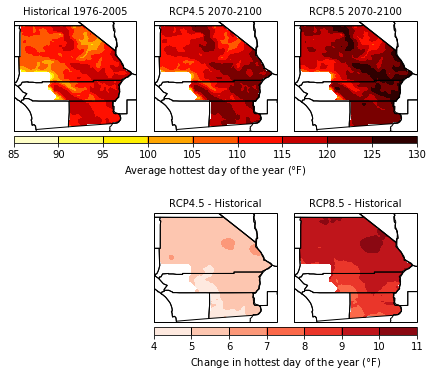

In [148]:
# Figure 9 Inland South ----- (need to crop to standard domain)
fig9_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig9_new/'
hist_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.historical.1976-2005.abs.nc', 'r')
rcp45_end_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.rcp45.2070-2100.abs.nc', 'r')
rcp85_end_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.rcp85.2070-2100.abs.nc', 'r')

hist_hottest_day = hist_hottest_day_nc.variables['max_temp_historical_1976-2005'][:,:]
rcp45_end_hottest_day = rcp45_end_hottest_day_nc.variables['max_temp_rcp45_2070-2100'][:,:]
rcp85_end_hottest_day = rcp85_end_hottest_day_nc.variables['max_temp_rcp85_2070-2100'][:,:]

# Convert from C to F
hist_hottest_day = (hist_hottest_day * (9/5)) + 32
rcp45_end_hottest_day = (rcp45_end_hottest_day * (9/5)) + 32
rcp85_end_hottest_day = (rcp85_end_hottest_day * (9/5)) + 32

# Calculate changes 
rcp45_change_hottest_day = rcp45_end_hottest_day - hist_hottest_day
rcp85_change_hottest_day = rcp85_end_hottest_day - hist_hottest_day

hist_hottest_day_nc.close()
rcp45_end_hottest_day_nc.close()
rcp85_end_hottest_day_nc.close()

# Cut out the region
hist_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, hist_hottest_day)
rcp45_end_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_end_hottest_day)
rcp85_end_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_end_hottest_day)
rcp45_change_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_change_hottest_day)
rcp85_change_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_change_hottest_day)


print(np.min(rcp45_change_hottest_day_reg), np.max(rcp85_change_hottest_day_reg))

# 5-panel plot
# Colorbar specifications
cbar_height = 0.015

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Historical 1976-2005', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks123 = np.linspace(85, 130, 10, endpoint=True)
plot1 = ax1.contourf(lon, lat, hist_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r')

ax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2070-2100', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, rcp45_end_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r')

ax3 = fig.add_subplot(2,3,3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP8.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, rcp85_end_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r')

ax5 = fig.add_subplot(2,3,5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP4.5 - Historical', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
ticks56 = np.linspace(4,11,8, endpoint=True)
plot5 = ax5.contourf(lon, lat, rcp45_change_hottest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Reds')

ax6 = fig.add_subplot(2,3,6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 - Historical', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, rcp85_change_hottest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Reds')

fig.tight_layout(h_pad=-6)

# Get subplot positions
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

cbar_ax123 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.155, ax3_pos.x1-ax1_pos.x0, cbar_height]) 
cbar123 = plt.colorbar(plot3, cax=cbar_ax123, ticks=ticks123, orientation='horizontal', drawedges=True)
cbar123.dividers.set_edgecolor('black')
cbar123.dividers.set_linewidth(1)
cbar123.set_label('Average hottest day of the year '+'('+r'$\degree$'+'F)')

cbar_ax56 = fig.add_axes([ax5_pos.x0, ax5_pos.y0+0.155, ax6_pos.x1-ax5_pos.x0, cbar_height])
cbar56 = plt.colorbar(plot6, cax=cbar_ax56, ticks=ticks56, orientation='horizontal', drawedges=True)
cbar56.dividers.set_edgecolor('black')
cbar56.dividers.set_linewidth(1)
cbar56.set_label('Change in hottest day of the year '+'('+r'$\degree$'+'F)')

plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig9_IS_region.eps')
plt.show()

4.47398 6.83539
6.93336 10.9483


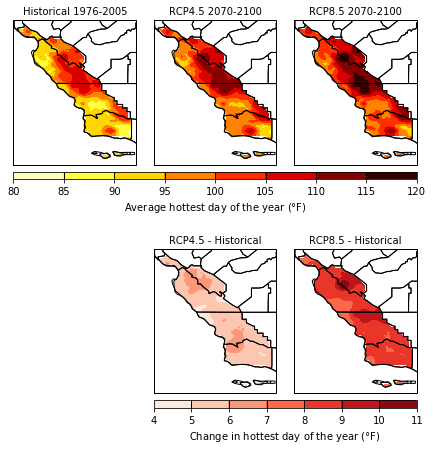

In [153]:
# Figure 9 Central Coast 
fig9_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig9_new/'
hist_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.historical.1976-2005.abs.nc', 'r')
rcp45_end_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.rcp45.2070-2100.abs.nc', 'r')
rcp85_end_hottest_day_nc = netCDF4.Dataset(fig9_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig09.avg_highest_day_year_tasmax_v4.R.rcp85.2070-2100.abs.nc', 'r')

hist_hottest_day = hist_hottest_day_nc.variables['max_temp_historical_1976-2005'][:,:]
rcp45_end_hottest_day = rcp45_end_hottest_day_nc.variables['max_temp_rcp45_2070-2100'][:,:]
rcp85_end_hottest_day = rcp85_end_hottest_day_nc.variables['max_temp_rcp85_2070-2100'][:,:]

# Convert from C to F
hist_hottest_day = (hist_hottest_day * (9/5)) + 32
rcp45_end_hottest_day = (rcp45_end_hottest_day * (9/5)) + 32
rcp85_end_hottest_day = (rcp85_end_hottest_day * (9/5)) + 32

# Calculate changes 
rcp45_change_hottest_day = rcp45_end_hottest_day - hist_hottest_day
rcp85_change_hottest_day = rcp85_end_hottest_day - hist_hottest_day

hist_hottest_day_nc.close()
rcp45_end_hottest_day_nc.close()
rcp85_end_hottest_day_nc.close()

# Cut out the region
hist_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, hist_hottest_day)
rcp45_end_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_end_hottest_day)
rcp85_end_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_end_hottest_day)
rcp45_change_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_change_hottest_day)
rcp85_change_hottest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_change_hottest_day)


#print(np.min(hist_hottest_day_reg), np.max(hist_hottest_day_reg))
#print(np.min(rcp45_end_hottest_day_reg), np.max(rcp45_end_hottest_day_reg))
#print(np.min(rcp85_end_hottest_day_reg), np.max(rcp85_end_hottest_day_reg))
print(np.min(rcp45_change_hottest_day_reg), np.max(rcp45_change_hottest_day_reg))
print(np.min(rcp85_change_hottest_day_reg), np.max(rcp85_change_hottest_day_reg))

# 5-panel plot
# Colorbar specifications
cbar_height = 0.015

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Historical 1976-2005', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks123 = np.linspace(80, 120, 9, endpoint=True)
plot1 = ax1.contourf(lon, lat, hist_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r')

ax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2070-2100', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, rcp45_end_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r')

ax3 = fig.add_subplot(2,3,3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP8.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, rcp85_end_hottest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='hot_r')

ax5 = fig.add_subplot(2,3,5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP4.5 - Historical', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
ticks56 = np.linspace(4,11,8, endpoint=True)
plot5 = ax5.contourf(lon, lat, rcp45_change_hottest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Reds')

ax6 = fig.add_subplot(2,3,6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 - Historical', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, rcp85_change_hottest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Reds')

fig.tight_layout(h_pad=0)

# Get subplot positions
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

cbar_ax123 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.08, ax3_pos.x1-ax1_pos.x0, cbar_height]) 
cbar123 = plt.colorbar(plot3, cax=cbar_ax123, ticks=ticks123, orientation='horizontal', drawedges=True)
cbar123.dividers.set_edgecolor('black')
cbar123.dividers.set_linewidth(1)
cbar123.set_label('Average hottest day of the year '+'('+r'$\degree$'+'F)')

cbar_ax56 = fig.add_axes([ax5_pos.x0, ax5_pos.y0+0.08, ax6_pos.x1-ax5_pos.x0, cbar_height])
cbar56 = plt.colorbar(plot6, cax=cbar_ax56, ticks=ticks56, orientation='horizontal', drawedges=True)
cbar56.dividers.set_edgecolor('black')
cbar56.dividers.set_linewidth(1)
cbar56.set_label('Change in hottest day of the year '+'('+r'$\degree$'+'F)')

plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig9_CC_region.eps')
plt.show()

# Figure 12 (Change in annual precipitation)
- Change `fig12_dir` to wherever you have saved the netCDF files
- Change start/end/number ticks in `plot_ticks = np.linspace(-10,10,11, endpoint=True)`
- Change `h_pad` and/or `w_pad` in `fig.tight_layout(h_pad=-13)`

-4.9064 1.39105
-4.05487 0.608182
-6.42497 0.353888
-8.30944 -0.181161
-5.74548 3.13187
-5.16936 9.68619


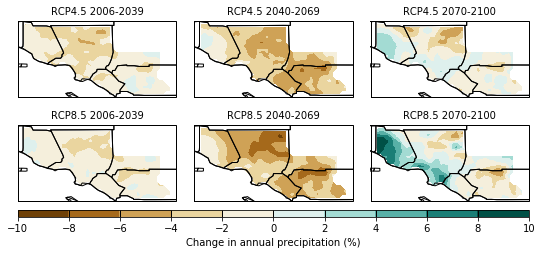

In [156]:
# Figure 12 LA REGION 
fig12_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig12_new/'
pr_rcp45_2006_2039_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2006-2039.yearly.nc', 'r')
pr_rcp45_2040_2069_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2040-2069.yearly.nc', 'r')
pr_rcp45_2070_2100_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2070-2100.yearly.nc', 'r')
pr_rcp85_2006_2039_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2006-2039.yearly.nc', 'r')
pr_rcp85_2040_2069_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2040-2069.yearly.nc', 'r')
pr_rcp85_2070_2100_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2070-2100.yearly.nc', 'r')

pr_rcp45_2006_2039 = pr_rcp45_2006_2039_nc.variables['z'][:,:]
pr_rcp45_2040_2069 = pr_rcp45_2040_2069_nc.variables['z'][:,:]
pr_rcp45_2070_2100 = pr_rcp45_2070_2100_nc.variables['z'][:,:]
pr_rcp85_2006_2039 = pr_rcp85_2006_2039_nc.variables['z'][:,:]
pr_rcp85_2040_2069 = pr_rcp85_2040_2069_nc.variables['z'][:,:]
pr_rcp85_2070_2100 = pr_rcp85_2070_2100_nc.variables['z'][:,:]

pr_rcp45_2006_2039_nc.close()
pr_rcp45_2040_2069_nc.close()
pr_rcp45_2070_2100_nc.close()
pr_rcp85_2006_2039_nc.close()
pr_rcp85_2040_2069_nc.close()
pr_rcp85_2070_2100_nc.close()

# Cut out the region
pr_rcp45_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2006_2039)
pr_rcp45_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2040_2069)
pr_rcp45_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2070_2100)
pr_rcp85_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2006_2039)
pr_rcp85_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2040_2069)
pr_rcp85_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2070_2100)

print(np.min(pr_rcp45_2006_2039_reg), np.max(pr_rcp45_2006_2039_reg))
print(np.min(pr_rcp85_2006_2039_reg), np.max(pr_rcp85_2006_2039_reg))
print(np.min(pr_rcp45_2040_2069_reg), np.max(pr_rcp45_2040_2069_reg))
print(np.min(pr_rcp85_2040_2069_reg), np.max(pr_rcp85_2040_2069_reg))
print(np.min(pr_rcp45_2070_2100_reg), np.max(pr_rcp45_2070_2100_reg))
print(np.min(pr_rcp85_2070_2100_reg), np.max(pr_rcp85_2070_2100_reg))
#6-panel plot 
plot_ticks = np.linspace(-10,10,11, endpoint=True)

fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('RCP4.5 2006-2039', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, pr_rcp45_2006_2039_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2040-2069', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, pr_rcp45_2040_2069_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP4.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, pr_rcp45_2070_2100_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('RCP8.5 2006-2039', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, pr_rcp85_2006_2039_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP8.5 2040-2069', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, pr_rcp85_2040_2069_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 2070-2100', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, pr_rcp85_2070_2100_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

fig.tight_layout(h_pad=-13) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Single colorbar for all panels
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.23, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar = plt.colorbar(plot6, cax=cbar_ax, orientation='horizontal', ticks=plot_ticks, drawedges=True)
cbar.set_label('Change in annual precipitation (%)', fontsize=10)
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig12_LA_region.eps')
plt.show()

-1.29171 3.31141
1.45752 7.20615
2.25355 9.28974
0.609498 5.12496
1.32002 7.68913
2.18757 15.8878


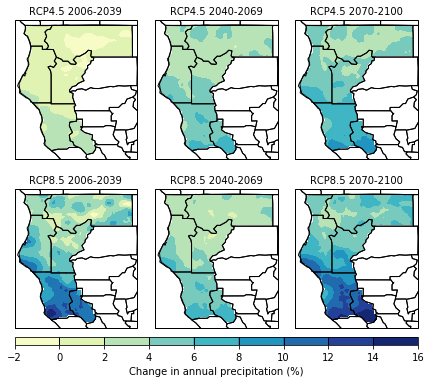

In [158]:
# Figure 12 -- NORTH COAST
fig12_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig12_new/'
pr_rcp45_2006_2039_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2006-2039.yearly.nc', 'r')
pr_rcp45_2040_2069_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2040-2069.yearly.nc', 'r')
pr_rcp45_2070_2100_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2070-2100.yearly.nc', 'r')
pr_rcp85_2006_2039_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2006-2039.yearly.nc', 'r')
pr_rcp85_2040_2069_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2040-2069.yearly.nc', 'r')
pr_rcp85_2070_2100_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2070-2100.yearly.nc', 'r')

pr_rcp45_2006_2039 = pr_rcp45_2006_2039_nc.variables['z'][:,:]
pr_rcp45_2040_2069 = pr_rcp45_2040_2069_nc.variables['z'][:,:]
pr_rcp45_2070_2100 = pr_rcp45_2070_2100_nc.variables['z'][:,:]
pr_rcp85_2006_2039 = pr_rcp85_2006_2039_nc.variables['z'][:,:]
pr_rcp85_2040_2069 = pr_rcp85_2040_2069_nc.variables['z'][:,:]
pr_rcp85_2070_2100 = pr_rcp85_2070_2100_nc.variables['z'][:,:]

pr_rcp45_2006_2039_nc.close()
pr_rcp45_2040_2069_nc.close()
pr_rcp45_2070_2100_nc.close()
pr_rcp85_2006_2039_nc.close()
pr_rcp85_2040_2069_nc.close()
pr_rcp85_2070_2100_nc.close()

# Cut out the region
pr_rcp45_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2006_2039)
pr_rcp45_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2040_2069)
pr_rcp45_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2070_2100)
pr_rcp85_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2006_2039)
pr_rcp85_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2040_2069)
pr_rcp85_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2070_2100)

print(np.min(pr_rcp45_2006_2039_reg), np.max(pr_rcp45_2006_2039_reg))
print(np.min(pr_rcp45_2040_2069_reg), np.max(pr_rcp45_2040_2069_reg))
print(np.min(pr_rcp45_2070_2100_reg), np.max(pr_rcp45_2070_2100_reg))
print(np.min(pr_rcp85_2006_2039_reg), np.max(pr_rcp85_2006_2039_reg))
print(np.min(pr_rcp85_2040_2069_reg), np.max(pr_rcp85_2040_2069_reg))
print(np.min(pr_rcp85_2070_2100_reg), np.max(pr_rcp85_2070_2100_reg))
#6-panel plot 

plot_ticks = np.linspace(-2,16,10, endpoint=True)

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('RCP4.5 2006-2039', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, pr_rcp45_2006_2039_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2040-2069', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, pr_rcp45_2040_2069_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP4.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, pr_rcp45_2070_2100_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('RCP8.5 2006-2039', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, pr_rcp85_2006_2039_reg, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP8.5 2040-2069', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, pr_rcp85_2040_2069_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 2070-2100', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, pr_rcp85_2070_2100_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

fig.tight_layout(h_pad=-10) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Single colorbar for all panels
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.14, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar = plt.colorbar(plot6, cax=cbar_ax, ticks=plot_ticks, orientation='horizontal', drawedges=True)
cbar.set_label('Change in annual precipitation (%)', fontsize=10)
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig12_NC_region.eps')
plt.show()

0.627897 4.14711
1.38942 8.49693
3.09117 10.4545
0.159528 5.21576
2.10543 9.37747
4.94485 19.8431


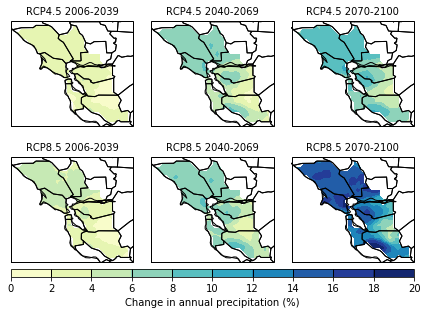

In [160]:
# Figure 12 -- SF Bay
fig12_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig12_new/'
pr_rcp45_2006_2039_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2006-2039.yearly.nc', 'r')
pr_rcp45_2040_2069_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2040-2069.yearly.nc', 'r')
pr_rcp45_2070_2100_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2070-2100.yearly.nc', 'r')
pr_rcp85_2006_2039_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2006-2039.yearly.nc', 'r')
pr_rcp85_2040_2069_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2040-2069.yearly.nc', 'r')
pr_rcp85_2070_2100_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2070-2100.yearly.nc', 'r')

# The LOCA grids used in Fig 8 need to be trimmed to match the grids used in Figs 12 and 15
pr_rcp45_2006_2039 = pr_rcp45_2006_2039_nc.variables['z'][:,:]
pr_rcp45_2040_2069 = pr_rcp45_2040_2069_nc.variables['z'][:,:]
pr_rcp45_2070_2100 = pr_rcp45_2070_2100_nc.variables['z'][:,:]
pr_rcp85_2006_2039 = pr_rcp85_2006_2039_nc.variables['z'][:,:]
pr_rcp85_2040_2069 = pr_rcp85_2040_2069_nc.variables['z'][:,:]
pr_rcp85_2070_2100 = pr_rcp85_2070_2100_nc.variables['z'][:,:]

pr_rcp45_2006_2039_nc.close()
pr_rcp45_2040_2069_nc.close()
pr_rcp45_2070_2100_nc.close()
pr_rcp85_2006_2039_nc.close()
pr_rcp85_2040_2069_nc.close()
pr_rcp85_2070_2100_nc.close()

# Cut out the region
pr_rcp45_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2006_2039)
pr_rcp45_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2040_2069)
pr_rcp45_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2070_2100)
pr_rcp85_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2006_2039)
pr_rcp85_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2040_2069)
pr_rcp85_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2070_2100)

print(np.min(pr_rcp45_2006_2039_reg), np.max(pr_rcp45_2006_2039_reg))
print(np.min(pr_rcp45_2040_2069_reg), np.max(pr_rcp45_2040_2069_reg))
print(np.min(pr_rcp45_2070_2100_reg), np.max(pr_rcp45_2070_2100_reg))
print(np.min(pr_rcp85_2006_2039_reg), np.max(pr_rcp85_2006_2039_reg))
print(np.min(pr_rcp85_2040_2069_reg), np.max(pr_rcp85_2040_2069_reg))
print(np.min(pr_rcp85_2070_2100_reg), np.max(pr_rcp85_2070_2100_reg))
#6-panel plot 
plot_ticks = np.linspace(0,20,11, endpoint=True)

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('RCP4.5 2006-2039', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, pr_rcp45_2006_2039_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2040-2069', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, pr_rcp45_2040_2069_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP4.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, pr_rcp45_2070_2100_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('RCP8.5 2006-2039', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, pr_rcp85_2006_2039_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP8.5 2040-2069', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, pr_rcp85_2040_2069_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 2070-2100', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, pr_rcp85_2070_2100_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='YlGnBu')

fig.tight_layout(h_pad=-14) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Single colorbar for all panels
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.21, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar = plt.colorbar(plot6, cax=cbar_ax, ticks=plot_ticks, orientation='horizontal', drawedges=True)
cbar.set_label('Change in annual precipitation (%)', fontsize=10)
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig12_SF_region.eps')
plt.show()

-8.09415 6.22559
-7.63542 6.46173
-9.89153 6.58272
-6.88293 4.42386
-11.258 2.61003
-7.4062 12.1498


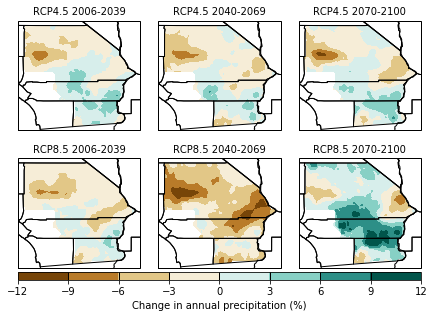

In [163]:
# Figure 12 -- Inland South 
fig12_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig12_new/'
pr_rcp45_2006_2039_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2006-2039.yearly.nc', 'r')
pr_rcp45_2040_2069_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2040-2069.yearly.nc', 'r')
pr_rcp45_2070_2100_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2070-2100.yearly.nc', 'r')
pr_rcp85_2006_2039_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2006-2039.yearly.nc', 'r')
pr_rcp85_2040_2069_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2040-2069.yearly.nc', 'r')
pr_rcp85_2070_2100_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2070-2100.yearly.nc', 'r')

pr_rcp45_2006_2039 = pr_rcp45_2006_2039_nc.variables['z'][:,:]
pr_rcp45_2040_2069 = pr_rcp45_2040_2069_nc.variables['z'][:,:]
pr_rcp45_2070_2100 = pr_rcp45_2070_2100_nc.variables['z'][:,:]
pr_rcp85_2006_2039 = pr_rcp85_2006_2039_nc.variables['z'][:,:]
pr_rcp85_2040_2069 = pr_rcp85_2040_2069_nc.variables['z'][:,:]
pr_rcp85_2070_2100 = pr_rcp85_2070_2100_nc.variables['z'][:,:]

pr_rcp45_2006_2039_nc.close()
pr_rcp45_2040_2069_nc.close()
pr_rcp45_2070_2100_nc.close()
pr_rcp85_2006_2039_nc.close()
pr_rcp85_2040_2069_nc.close()
pr_rcp85_2070_2100_nc.close()

# Cut out the region
pr_rcp45_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2006_2039)
pr_rcp45_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2040_2069)
pr_rcp45_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2070_2100)
pr_rcp85_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2006_2039)
pr_rcp85_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2040_2069)
pr_rcp85_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2070_2100)

#6-panel plot 
print(np.min(pr_rcp45_2006_2039_reg), np.max(pr_rcp45_2006_2039_reg))
print(np.min(pr_rcp45_2040_2069_reg), np.max(pr_rcp45_2040_2069_reg))
print(np.min(pr_rcp45_2070_2100_reg), np.max(pr_rcp45_2070_2100_reg))
print(np.min(pr_rcp85_2006_2039_reg), np.max(pr_rcp85_2006_2039_reg))
print(np.min(pr_rcp85_2040_2069_reg), np.max(pr_rcp85_2040_2069_reg))
print(np.min(pr_rcp85_2070_2100_reg), np.max(pr_rcp85_2070_2100_reg))
plot_ticks = np.linspace(-12,12,9, endpoint=True)

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('RCP4.5 2006-2039', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, pr_rcp45_2006_2039_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2040-2069', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, pr_rcp45_2040_2069_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP4.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, pr_rcp45_2070_2100_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('RCP8.5 2006-2039', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, pr_rcp85_2006_2039_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP8.5 2040-2069', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, pr_rcp85_2040_2069_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 2070-2100', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, pr_rcp85_2070_2100_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

fig.tight_layout(h_pad=-14) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Single colorbar for all panels
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.21, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar = plt.colorbar(plot6, cax=cbar_ax, orientation='horizontal', ticks=plot_ticks, drawedges=True)
cbar.set_label('Change in annual precipitation (%)', fontsize=10)
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig12_IS_region.eps')
plt.show()

-2.92752 3.87367
-2.83038 8.15228
-5.0513 9.8554
-3.31799 3.86899
-6.71182 8.82512
-1.01969 18.8372


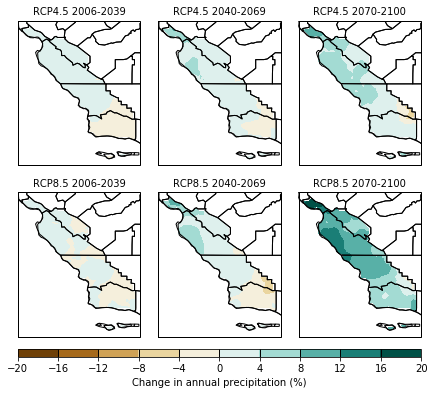

In [166]:
# Figure 12 -- Central Coast
fig12_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig12_new/'
pr_rcp45_2006_2039_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2006-2039.yearly.nc', 'r')
pr_rcp45_2040_2069_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2040-2069.yearly.nc', 'r')
pr_rcp45_2070_2100_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp45.2070-2100.yearly.nc', 'r')
pr_rcp85_2006_2039_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2006-2039.yearly.nc', 'r')
pr_rcp85_2040_2069_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2040-2069.yearly.nc', 'r')
pr_rcp85_2070_2100_nc = netCDF4.Dataset(fig12_dir+
            'Pierce_et_al_scenarios_2018-07-09_fig12.mean_change_byperiod_pr_v5_10mods.R.rcp85.2070-2100.yearly.nc', 'r')

# The LOCA grids used in Fig 8 need to be trimmed to match the grids used in Figs 12 and 15
pr_rcp45_2006_2039 = pr_rcp45_2006_2039_nc.variables['z'][:,:]
pr_rcp45_2040_2069 = pr_rcp45_2040_2069_nc.variables['z'][:,:]
pr_rcp45_2070_2100 = pr_rcp45_2070_2100_nc.variables['z'][:,:]
pr_rcp85_2006_2039 = pr_rcp85_2006_2039_nc.variables['z'][:,:]
pr_rcp85_2040_2069 = pr_rcp85_2040_2069_nc.variables['z'][:,:]
pr_rcp85_2070_2100 = pr_rcp85_2070_2100_nc.variables['z'][:,:]

pr_rcp45_2006_2039_nc.close()
pr_rcp45_2040_2069_nc.close()
pr_rcp45_2070_2100_nc.close()
pr_rcp85_2006_2039_nc.close()
pr_rcp85_2040_2069_nc.close()
pr_rcp85_2070_2100_nc.close()

# Cut out the region
pr_rcp45_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2006_2039)
pr_rcp45_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2040_2069)
pr_rcp45_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp45_2070_2100)
pr_rcp85_2006_2039_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2006_2039)
pr_rcp85_2040_2069_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2040_2069)
pr_rcp85_2070_2100_reg = np.ma.masked_where(region_arr!=region_code, pr_rcp85_2070_2100)

#6-panel plot 
print(np.min(pr_rcp45_2006_2039_reg), np.max(pr_rcp45_2006_2039_reg))
print(np.min(pr_rcp45_2040_2069_reg), np.max(pr_rcp45_2040_2069_reg))
print(np.min(pr_rcp45_2070_2100_reg), np.max(pr_rcp45_2070_2100_reg))
print(np.min(pr_rcp85_2006_2039_reg), np.max(pr_rcp85_2006_2039_reg))
print(np.min(pr_rcp85_2040_2069_reg), np.max(pr_rcp85_2040_2069_reg))
print(np.min(pr_rcp85_2070_2100_reg), np.max(pr_rcp85_2070_2100_reg))

plot_ticks = np.linspace(-20,20,11, endpoint=True)

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('RCP4.5 2006-2039', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
plot1 = ax1.contourf(lon, lat, pr_rcp45_2006_2039_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2040-2069', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, pr_rcp45_2040_2069_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP4.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, pr_rcp45_2070_2100_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4.coastlines('50m')
ax4.set_title('RCP8.5 2006-2039', fontsize=10)
ax4.add_feature(states_provinces, edgecolor='black')
ax4.add_feature(counties, edgecolor='black')
plot4 = ax4.contourf(lon, lat, pr_rcp85_2006_2039_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP8.5 2040-2069', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
plot5 = ax5.contourf(lon, lat, pr_rcp85_2040_2069_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 2070-2100', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, pr_rcp85_2070_2100_reg, plot_ticks, transform=ccrs.PlateCarree(), cmap='BrBG')

fig.tight_layout(h_pad=-10) # Adjust w_pad abd h_pad, as necessary 

# Colorbar specifications
cbar_height = 0.015

# Obtain axes coordinates for each subplot for colorbar positioning
ax1_pos = ax1.get_position() # details on ax1_pos.x0, .y0, .x1, .y1, .height .width
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

# Single colorbar for all panels
cbar_ax = fig.add_axes([ax4_pos.x0, ax4_pos.y0+0.125, ax6_pos.x1-ax4_pos.x0, cbar_height]) # bottom left corner x,y, and width,height
cbar = plt.colorbar(plot6, cax=cbar_ax, orientation='horizontal', ticks=plot_ticks, drawedges=True)
cbar.set_label('Change in annual precipitation (%)', fontsize=10)
cbar.dividers.set_edgecolor('black')
cbar.dividers.set_linewidth(1)

#plt.suptitle('{0}: Early vs. Late Historical Tmax, Tmin, and Pr'.format(region_name))
#plt.subplots_adjust(hspace=0.4, wspace=0.25)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig12_CC_region.eps')
plt.show()

# Figure 15 (Wettest day of the year)
- Change `fig15_dir` to wherever you have saved the netCDF files
- Change start/end/number ticks in `ticks123 = np.linspace(0,8,9, endpoint=True)`
- Change start/end/number ticks in `ticks56 = np.linspace(-3,30,12, endpoint=True)`
- Change `h_pad` and/or `w_pad` in `fig.tight_layout(h_pad=4.5)`

0.735105 5.71627
0.755766 6.28928
0.788556 7.16025
-2.78081 21.7681
1.13775 28.9733


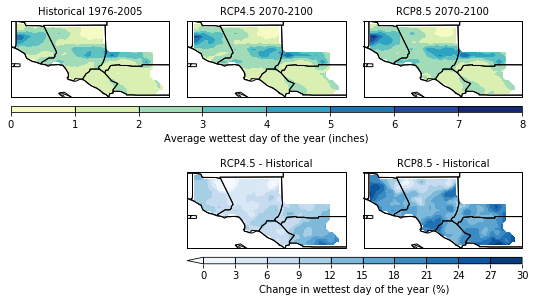

In [9]:
# Figure 15 LA REGION
fig15_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig15_new/'
hist_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.1976-2005.abs.nc', 'r')
rcp45_end_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp45.2070-2100.abs.nc', 'r')
rcp85_end_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp85.2070-2100.abs.nc', 'r')
rcp45_change_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp45.2070-2100.change.nc', 'r')
rcp85_change_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp85.2070-2100.change.nc', 'r')                                        

hist_wettest_day = hist_wettest_day_nc.variables['z'][:,:]
rcp45_end_wettest_day = rcp45_end_wettest_day_nc.variables['z'][:,:]
rcp85_end_wettest_day = rcp85_end_wettest_day_nc.variables['z'][:,:]
rcp45_change_wettest_day = rcp45_change_wettest_day_nc.variables['z'][:,:]
rcp85_change_wettest_day = rcp85_change_wettest_day_nc.variables['z'][:,:]

hist_wettest_day_nc.close()
rcp45_end_wettest_day_nc.close()
rcp85_end_wettest_day_nc.close()
rcp45_change_wettest_day_nc.close()
rcp85_change_wettest_day_nc.close()

# Convery from cm to inches
hist_wettest_day = hist_wettest_day * (1./2.54)
rcp45_end_wettest_day = rcp45_end_wettest_day * (1./2.54)
rcp85_end_wettest_day = rcp85_end_wettest_day * (1./2.54)

# Cut out the region
hist_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, hist_wettest_day)
rcp45_end_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_end_wettest_day)
rcp85_end_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_end_wettest_day)
rcp45_change_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_change_wettest_day)
rcp85_change_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_change_wettest_day)

print(np.min(hist_wettest_day_reg), np.max(hist_wettest_day_reg))
print(np.min(rcp45_end_wettest_day_reg), np.max(rcp45_end_wettest_day_reg))
print(np.min(rcp85_end_wettest_day_reg), np.max(rcp85_end_wettest_day_reg))
print(np.min(rcp45_change_wettest_day_reg), np.max(rcp45_change_wettest_day_reg))
print(np.min(rcp85_change_wettest_day_reg), np.max(rcp85_change_wettest_day_reg))
# 5-panel plot
# Colorbar specifications
cbar_height = 0.015

fig = plt.figure(figsize=(7.5,6))

ax1 = fig.add_subplot(3,3,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Historical 1976-2005', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks123 = np.linspace(0,8,9, endpoint=True)
plot1 = ax1.contourf(lon, lat, hist_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax2 = fig.add_subplot(3,3,2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2070-2100', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, rcp45_end_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax3 = fig.add_subplot(3,3,3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP8.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, rcp85_end_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax5 = fig.add_subplot(3,3,5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP4.5 - Historical', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
#ticks56 = np.linspace(-3,30,12, endpoint=True)
ticks56 = np.linspace(0,30,11, endpoint=True)
#plot5 = ax5.contourf(lon, lat, rcp45_change_wettest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Blues')
plot5 = ax5.contourf(lon, lat, rcp45_change_wettest_day_reg, ticks56, extend='min', transform=ccrs.PlateCarree(), cmap='Blues')

ax6 = fig.add_subplot(3,3,6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 - Historical', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
#plot6 = ax6.contourf(lon, lat, rcp85_change_wettest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Blues')
plot6 = ax6.contourf(lon, lat, rcp85_change_wettest_day_reg, ticks56, extend='min', transform=ccrs.PlateCarree(), cmap='Blues')

fig.tight_layout(h_pad=4.5)

# Get subplot positions
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
#ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

cbar_ax123 = fig.add_axes([ax1_pos.x0, ax1_pos.y0, ax3_pos.x1-ax1_pos.x0, cbar_height]) 
cbar123 = plt.colorbar(plot3, cax=cbar_ax123, orientation='horizontal', ticks=ticks123, drawedges=True)
cbar123.dividers.set_edgecolor('black')
cbar123.dividers.set_linewidth(1)
cbar123.set_label('Average wettest day of the year (inches)')

cbar_ax56 = fig.add_axes([ax5_pos.x0, ax5_pos.y0, ax6_pos.x1-ax5_pos.x0, cbar_height])
cbar56 = plt.colorbar(plot6, cax=cbar_ax56, orientation='horizontal', ticks=ticks56, drawedges=True)
cbar56.dividers.set_edgecolor('black')
cbar56.dividers.set_linewidth(1)
cbar56.set_label('Change in wettest day of the year (%)')

plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig15_LA_region.eps')
plt.show()

0.610175 7.88993
0.652239 8.5835
0.667135 9.32815
1.35428 16.0473
6.69038 29.5079


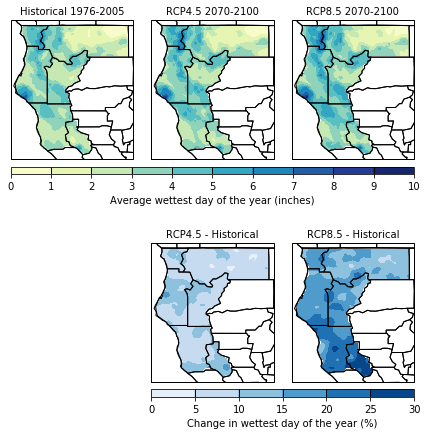

In [182]:
# Figure 15 -- North Coast
fig15_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig15_new/'
hist_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.1976-2005.abs.nc', 'r')
rcp45_end_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp45.2070-2100.abs.nc', 'r')
rcp85_end_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp85.2070-2100.abs.nc', 'r')
rcp45_change_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp45.2070-2100.change.nc', 'r')
rcp85_change_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp85.2070-2100.change.nc', 'r')                                        

hist_wettest_day = hist_wettest_day_nc.variables['z'][:,:]
rcp45_end_wettest_day = rcp45_end_wettest_day_nc.variables['z'][:,:]
rcp85_end_wettest_day = rcp85_end_wettest_day_nc.variables['z'][:,:]
rcp45_change_wettest_day = rcp45_change_wettest_day_nc.variables['z'][:,:]
rcp85_change_wettest_day = rcp85_change_wettest_day_nc.variables['z'][:,:]

hist_wettest_day_nc.close()
rcp45_end_wettest_day_nc.close()
rcp85_end_wettest_day_nc.close()
rcp45_change_wettest_day_nc.close()
rcp85_change_wettest_day_nc.close()

# Convery from cm to inches
hist_wettest_day = hist_wettest_day * (1./2.54)
rcp45_end_wettest_day = rcp45_end_wettest_day * (1./2.54)
rcp85_end_wettest_day = rcp85_end_wettest_day * (1./2.54)

# Cut out the region
hist_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, hist_wettest_day)
rcp45_end_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_end_wettest_day)
rcp85_end_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_end_wettest_day)
rcp45_change_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_change_wettest_day)
rcp85_change_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_change_wettest_day)

print(np.min(hist_wettest_day_reg), np.max(hist_wettest_day_reg))
print(np.min(rcp45_end_wettest_day_reg), np.max(rcp45_end_wettest_day_reg))
print(np.min(rcp85_end_wettest_day_reg), np.max(rcp85_end_wettest_day_reg))
print(np.min(rcp45_change_wettest_day_reg), np.max(rcp45_change_wettest_day_reg))
print(np.min(rcp85_change_wettest_day_reg), np.max(rcp85_change_wettest_day_reg))
# 5-panel plot
# Colorbar specifications
cbar_height = 0.015

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Historical 1976-2005', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks123 = np.linspace(0,10,11, endpoint=True)
plot1 = ax1.contourf(lon, lat, hist_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2070-2100', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, rcp45_end_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax3 = fig.add_subplot(2,3,3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP8.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, rcp85_end_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax5 = fig.add_subplot(2,3,5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP4.5 - Historical', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
ticks56 = np.linspace(0,30,7, endpoint=True)
plot5 = ax5.contourf(lon, lat, rcp45_change_wettest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Blues')

ax6 = fig.add_subplot(2,3,6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 - Historical', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, rcp85_change_wettest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Blues')

fig.tight_layout(h_pad=-1)

# Get subplot positions
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax4_pos = ax4.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

cbar_ax123 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.09, ax3_pos.x1-ax1_pos.x0, cbar_height]) 
cbar123 = plt.colorbar(plot3, cax=cbar_ax123, orientation='horizontal', ticks=ticks123, drawedges=True)
cbar123.dividers.set_edgecolor('black')
cbar123.dividers.set_linewidth(1)
cbar123.set_label('Average wettest day of the year (inches)')

cbar_ax56 = fig.add_axes([ax5_pos.x0, ax5_pos.y0+0.09, ax6_pos.x1-ax5_pos.x0, cbar_height])
cbar56 = plt.colorbar(plot6, cax=cbar_ax56, orientation='horizontal', ticks=ticks56, drawedges=True)
cbar56.dividers.set_edgecolor('black')
cbar56.dividers.set_linewidth(1)
cbar56.set_label('Change in wettest day of the year (%)')

plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig15_NC_region.eps')
plt.show()

6.07931 21.4023
12.5968 37.3459


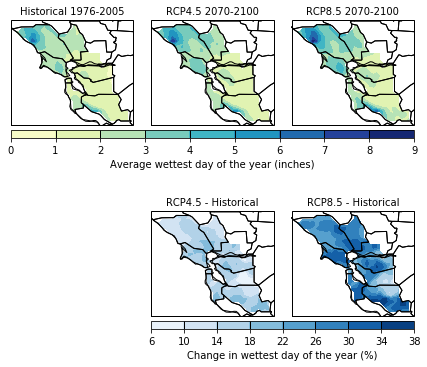

In [5]:
# Figure 15 -- SF Bay
fig15_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig15_new/'
hist_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.1976-2005.abs.nc', 'r')
rcp45_end_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp45.2070-2100.abs.nc', 'r')
rcp85_end_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp85.2070-2100.abs.nc', 'r')
rcp45_change_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp45.2070-2100.change.nc', 'r')
rcp85_change_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp85.2070-2100.change.nc', 'r')                                        

hist_wettest_day = hist_wettest_day_nc.variables['z'][:,:]
rcp45_end_wettest_day = rcp45_end_wettest_day_nc.variables['z'][:,:]
rcp85_end_wettest_day = rcp85_end_wettest_day_nc.variables['z'][:,:]
rcp45_change_wettest_day = rcp45_change_wettest_day_nc.variables['z'][:,:]
rcp85_change_wettest_day = rcp85_change_wettest_day_nc.variables['z'][:,:]

hist_wettest_day_nc.close()
rcp45_end_wettest_day_nc.close()
rcp85_end_wettest_day_nc.close()
rcp45_change_wettest_day_nc.close()
rcp85_change_wettest_day_nc.close()

# Convert from cm to inches
hist_wettest_day = hist_wettest_day * (1./2.54)
rcp45_end_wettest_day = rcp45_end_wettest_day * (1./2.54)
rcp85_end_wettest_day = rcp85_end_wettest_day * (1./2.54)

# Cut out the region
hist_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, hist_wettest_day)
rcp45_end_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_end_wettest_day)
rcp85_end_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_end_wettest_day)
rcp45_change_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_change_wettest_day)
rcp85_change_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_change_wettest_day)

#print(np.mean(rcp85_change_wettest_day_reg.flatten()))

#print(np.min(hist_wettest_day_reg), np.max(hist_wettest_day_reg))
#print(np.min(rcp45_end_wettest_day_reg), np.max(rcp45_end_wettest_day_reg))
#print(np.min(rcp85_end_wettest_day_reg), np.max(rcp85_end_wettest_day_reg))
#print(np.mean(np.mean(rcp45_change_wettest_day_reg), axis=0), axis=0)
print(np.min(rcp45_change_wettest_day_reg), np.max(rcp45_change_wettest_day_reg))
print(np.min(rcp85_change_wettest_day_reg), np.max(rcp85_change_wettest_day_reg))
# 5-panel plot
# Colorbar specifications
cbar_height = 0.015

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Historical 1976-2005', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks123 = np.linspace(0,9,10, endpoint=True)
plot1 = ax1.contourf(lon, lat, hist_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2070-2100', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, rcp45_end_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax3 = fig.add_subplot(2,3,3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP8.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, rcp85_end_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax5 = fig.add_subplot(2,3,5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP4.5 - Historical', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
ticks56 = np.linspace(6,38,9, endpoint=True)
plot5 = ax5.contourf(lon, lat, rcp45_change_wettest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Blues')

ax6 = fig.add_subplot(2,3,6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 - Historical', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, rcp85_change_wettest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Blues')

fig.tight_layout(h_pad=-6)

# Get subplot positions
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

cbar_ax123 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.16, ax3_pos.x1-ax1_pos.x0, cbar_height]) 
cbar123 = plt.colorbar(plot3, cax=cbar_ax123, ticks=ticks123, orientation='horizontal', drawedges=True)
cbar123.dividers.set_edgecolor('black')
cbar123.dividers.set_linewidth(1)
cbar123.set_label('Average wettest day of the year (inches)')

cbar_ax56 = fig.add_axes([ax5_pos.x0, ax5_pos.y0+0.16, ax6_pos.x1-ax5_pos.x0, cbar_height])
cbar56 = plt.colorbar(plot6, cax=cbar_ax56, ticks=ticks56, orientation='horizontal', drawedges=True)
cbar56.dividers.set_edgecolor('black')
cbar56.dividers.set_linewidth(1)
cbar56.set_label('Change in wettest day of the year (%)')

plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig15_SF_region.eps')
plt.show()

0.285062 3.12132
0.307775 3.41688
0.301875 3.64052


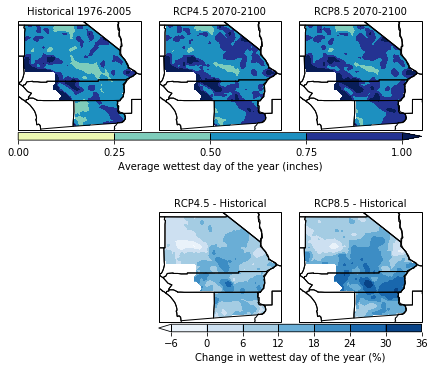

In [199]:
# Figure 15 -- Inland South
fig15_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig15_new/'
hist_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.1976-2005.abs.nc', 'r')
rcp45_end_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp45.2070-2100.abs.nc', 'r')
rcp85_end_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp85.2070-2100.abs.nc', 'r')
rcp45_change_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp45.2070-2100.change.nc', 'r')
rcp85_change_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp85.2070-2100.change.nc', 'r')                                        

# The LOCA grids used in Fig 9 need to be trimmed to match the grids used in Figs 12 and 15
hist_wettest_day = hist_wettest_day_nc.variables['z'][:,:]
rcp45_end_wettest_day = rcp45_end_wettest_day_nc.variables['z'][:,:]
rcp85_end_wettest_day = rcp85_end_wettest_day_nc.variables['z'][:,:]
rcp45_change_wettest_day = rcp45_change_wettest_day_nc.variables['z'][:,:]
rcp85_change_wettest_day = rcp85_change_wettest_day_nc.variables['z'][:,:]

hist_wettest_day_nc.close()
rcp45_end_wettest_day_nc.close()
rcp85_end_wettest_day_nc.close()
rcp45_change_wettest_day_nc.close()
rcp85_change_wettest_day_nc.close()

# Convert from cm to inches
hist_wettest_day = hist_wettest_day * (1./2.54)
rcp45_end_wettest_day = rcp45_end_wettest_day * (1./2.54)
rcp85_end_wettest_day = rcp85_end_wettest_day * (1./2.54)

# Cut out the region
hist_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, hist_wettest_day)
rcp45_end_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_end_wettest_day)
rcp85_end_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_end_wettest_day)
rcp45_change_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_change_wettest_day)
rcp85_change_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_change_wettest_day)

print(np.min(hist_wettest_day_reg), np.max(hist_wettest_day_reg))
print(np.min(rcp45_end_wettest_day_reg), np.max(rcp45_end_wettest_day_reg))
print(np.min(rcp85_end_wettest_day_reg), np.max(rcp85_end_wettest_day_reg))

#print(np.min(rcp45_change_wettest_day_reg), np.max(rcp45_change_wettest_day_reg))
#print(np.min(rcp85_change_wettest_day_reg ), np.max(rcp85_change_wettest_day_reg))

# 5-panel plot
# Colorbar specifications
cbar_height = 0.015

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Historical 1976-2005', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks123 = np.linspace(0,1,5, endpoint=True)
plot1 = ax1.contourf(lon, lat, hist_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), extend='max', cmap='YlGnBu')

ax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2070-2100', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, rcp45_end_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), extend='max', cmap='YlGnBu')

ax3 = fig.add_subplot(2,3,3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP8.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, rcp85_end_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), extend='max', cmap='YlGnBu')

ax5 = fig.add_subplot(2,3,5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP4.5 - Historical', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
ticks56 = np.linspace(-6, 36, 8, endpoint=True)
plot5 = ax5.contourf(lon, lat, rcp45_change_wettest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Blues', extend='min')

ax6 = fig.add_subplot(2,3,6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 - Historical', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, rcp85_change_wettest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Blues', extend='min')

fig.tight_layout(h_pad=-6)

# Get subplot positions
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

cbar_ax123 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.16, ax3_pos.x1-ax1_pos.x0, cbar_height]) 
cbar123 = plt.colorbar(plot3, cax=cbar_ax123, ticks=ticks123, orientation='horizontal', drawedges=True)
cbar123.dividers.set_edgecolor('black')
cbar123.dividers.set_linewidth(1)
cbar123.set_label('Average wettest day of the year (inches)')

cbar_ax56 = fig.add_axes([ax5_pos.x0, ax5_pos.y0+0.16, ax6_pos.x1-ax5_pos.x0, cbar_height])
cbar56 = plt.colorbar(plot6, cax=cbar_ax56, ticks=ticks56, orientation='horizontal', drawedges=True, extend='min')
cbar56.dividers.set_edgecolor('black')
cbar56.dividers.set_linewidth(1)
cbar56.set_label('Change in wettest day of the year (%)')

plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig15_IS_region.eps')
plt.show()

0.6515 5.1678
0.685182 5.71795
0.763657 6.63797


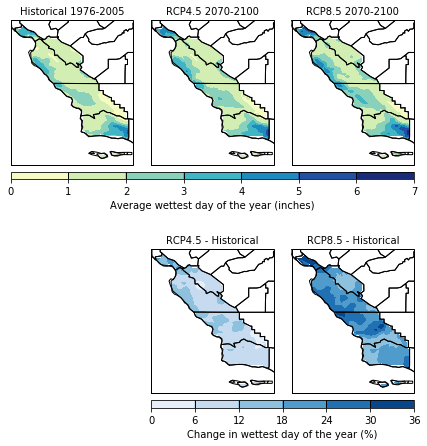

In [197]:
# Figure 15 -- Central Coast
fig15_dir = '/Users/nberg/Documents/CA4thAssessment/data/fig15_new/'
hist_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.1976-2005.abs.nc', 'r')
rcp45_end_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp45.2070-2100.abs.nc', 'r')
rcp85_end_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp85.2070-2100.abs.nc', 'r')
rcp45_change_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp45.2070-2100.change.nc', 'r')
rcp85_change_wettest_day_nc = netCDF4.Dataset(fig15_dir+
        'Pierce_et_al_scenarios_2018-07-09_fig15.avg_highest_day_year_pr_v5b.R.rcp85.2070-2100.change.nc', 'r')  

hist_wettest_day = hist_wettest_day_nc.variables['z'][:,:]
rcp45_end_wettest_day = rcp45_end_wettest_day_nc.variables['z'][:,:]
rcp85_end_wettest_day = rcp85_end_wettest_day_nc.variables['z'][:,:]
rcp45_change_wettest_day = rcp45_change_wettest_day_nc.variables['z'][:,:]
rcp85_change_wettest_day = rcp85_change_wettest_day_nc.variables['z'][:,:]

hist_wettest_day_nc.close()
rcp45_end_wettest_day_nc.close()
rcp85_end_wettest_day_nc.close()
rcp45_change_wettest_day_nc.close()
rcp85_change_wettest_day_nc.close()

# Convert from cm to inches
hist_wettest_day = hist_wettest_day * (1./2.54)
rcp45_end_wettest_day = rcp45_end_wettest_day * (1./2.54)
rcp85_end_wettest_day = rcp85_end_wettest_day * (1./2.54)

# Cut out the region
hist_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, hist_wettest_day)
rcp45_end_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_end_wettest_day)
rcp85_end_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_end_wettest_day)
rcp45_change_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp45_change_wettest_day)
rcp85_change_wettest_day_reg = np.ma.masked_where(region_arr!=region_code, rcp85_change_wettest_day)

print(np.min(hist_wettest_day_reg), np.max(hist_wettest_day_reg))
print(np.min(rcp45_end_wettest_day_reg), np.max(rcp45_end_wettest_day_reg))
print(np.min(rcp85_end_wettest_day_reg), np.max(rcp85_end_wettest_day_reg))

#print(np.min(rcp45_change_wettest_day_reg), np.max(rcp45_change_wettest_day_reg))
#print(np.min(rcp85_change_wettest_day_reg ), np.max(rcp85_change_wettest_day_reg))

# 5-panel plot
# Colorbar specifications
cbar_height = 0.015

fig = plt.figure(figsize=(6,7))

ax1 = fig.add_subplot(2,3,1, projection=ccrs.PlateCarree())
ax1.coastlines('50m')
ax1.set_title('Historical 1976-2005', fontsize=10)
ax1.add_feature(states_provinces, edgecolor='black')
ax1.add_feature(counties, edgecolor='black')
ticks123 = np.linspace(0,7,8, endpoint=True)
plot1 = ax1.contourf(lon, lat, hist_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax2 = fig.add_subplot(2,3,2, projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_title('RCP4.5 2070-2100', fontsize=10)
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(counties, edgecolor='black')
plot2 = ax2.contourf(lon, lat, rcp45_end_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax3 = fig.add_subplot(2,3,3, projection=ccrs.PlateCarree())
ax3.coastlines('50m')
ax3.set_title('RCP8.5 2070-2100', fontsize=10)
ax3.add_feature(states_provinces, edgecolor='black')
ax3.add_feature(counties, edgecolor='black')
plot3 = ax3.contourf(lon, lat, rcp85_end_wettest_day_reg, ticks123, transform=ccrs.PlateCarree(), cmap='YlGnBu')

ax5 = fig.add_subplot(2,3,5, projection=ccrs.PlateCarree())
ax5.coastlines('50m')
ax5.set_title('RCP4.5 - Historical', fontsize=10)
ax5.add_feature(states_provinces, edgecolor='black')
ax5.add_feature(counties, edgecolor='black')
ticks56 = np.linspace(0, 36, 7, endpoint=True)
plot5 = ax5.contourf(lon, lat, rcp45_change_wettest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Blues')

ax6 = fig.add_subplot(2,3,6, projection=ccrs.PlateCarree())
ax6.coastlines('50m')
ax6.set_title('RCP8.5 - Historical', fontsize=10)
ax6.add_feature(states_provinces, edgecolor='black')
ax6.add_feature(counties, edgecolor='black')
plot6 = ax6.contourf(lon, lat, rcp85_change_wettest_day_reg, ticks56, transform=ccrs.PlateCarree(), cmap='Blues')

fig.tight_layout(h_pad=0)

# Get subplot positions
ax1_pos = ax1.get_position()
ax2_pos = ax2.get_position()
ax3_pos = ax3.get_position()
ax5_pos = ax5.get_position()
ax6_pos = ax6.get_position()

cbar_ax123 = fig.add_axes([ax1_pos.x0, ax1_pos.y0+0.08, ax3_pos.x1-ax1_pos.x0, cbar_height]) 
cbar123 = plt.colorbar(plot3, cax=cbar_ax123, ticks=ticks123, orientation='horizontal', drawedges=True)
cbar123.dividers.set_edgecolor('black')
cbar123.dividers.set_linewidth(1)
cbar123.set_label('Average wettest day of the year (inches)')

cbar_ax56 = fig.add_axes([ax5_pos.x0, ax5_pos.y0+0.08, ax6_pos.x1-ax5_pos.x0, cbar_height])
cbar56 = plt.colorbar(plot6, cax=cbar_ax56, ticks=ticks56, orientation='horizontal', drawedges=True)
cbar56.dividers.set_edgecolor('black')
cbar56.dividers.set_linewidth(1)
cbar56.set_label('Change in wettest day of the year (%)')

plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/fig15_CC_region.eps')
plt.show()

# 1950-2100 time series of annual max temperature

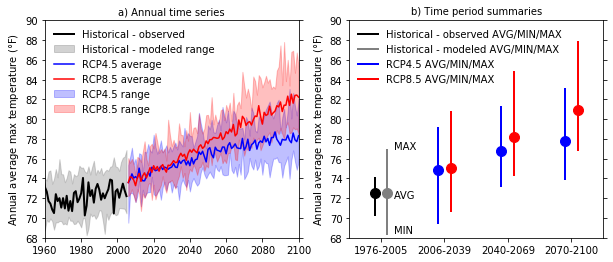

In [5]:
import pandas as pd
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/la_region_tmax_timeseries_rcp45.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/la_region_tmax_timeseries_rcp85.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
ax1.set_yticks(range(68,92,2))
ax1.set_yticklabels(str(t) for t in range(68,92,2))
ax1.set_ylim(68,90)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')
ax2.set_xlim(-0.5,3.5)
ax2.set_yticks(range(68,92,2))
ax2.set_yticklabels(str(t) for t in range(68,92,2))
ax2.set_ylim(68,90)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 72, 'AVG', color='black')
ax2.text(0.2, 68.5, 'MIN', color='black')
ax2.text(0.2, 77, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/LA_region_Tmax_timeseries.jpeg')
#plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/LA_region_Tmax_timeseries.pdf', dpi=300)
plt.show()

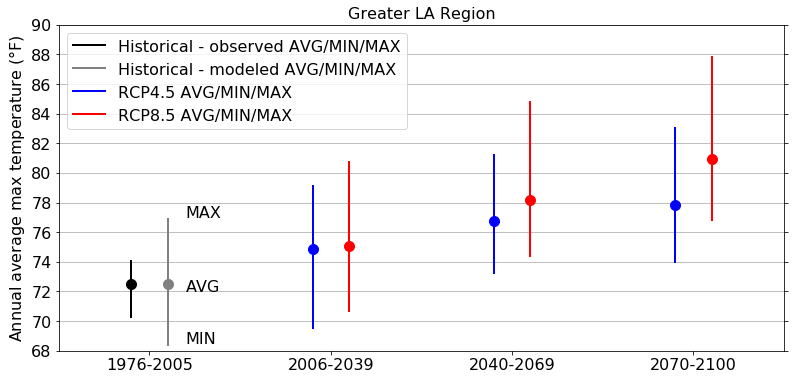

In [18]:
# LA Figures for SoCal Edison talk 
import pandas as pd
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/la_region_tmax_timeseries_rcp45.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/la_region_tmax_timeseries_rcp85.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(13,6))

# Bar chart summary panel ----
ax1 = fig.add_subplot(1,1,1)

# Observed and modeled historical lines
ax1.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax1.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax1.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax1.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax1.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax1.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax1.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax1.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax1.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax1.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax1.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax1.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax1.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax1.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax1.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax1.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax1.set_title('Greater LA Region', fontsize=16)
ax1.set_xticks(range(0,4))
ax1.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'], fontsize=16)
ax1.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)', fontsize=16)
ax1.set_xlim(-0.5,3.5)
ax1.set_yticks(range(68,92,2))
ax1.set_yticklabels([str(t) for t in range(68,92,2)], fontsize=16)
ax1.set_ylim(68,90)
ax1.yaxis.set_ticks_position('both')
ax1.yaxis.grid(True)
#ax2.yaxis.grid(True)
ax1.text(0.2, 72, 'AVG', color='black', fontsize=16)
ax1.text(0.2, 68.5, 'MIN', color='black', fontsize=16)
ax1.text(0.2, 77, 'MAX', color='black', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('/Users/nberg/Desktop/LA_region_Tmax_timeseries_4.jpeg')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nberg/Desktop/presentation_figures/LA_region_Tmax_timeseries_4.eps'

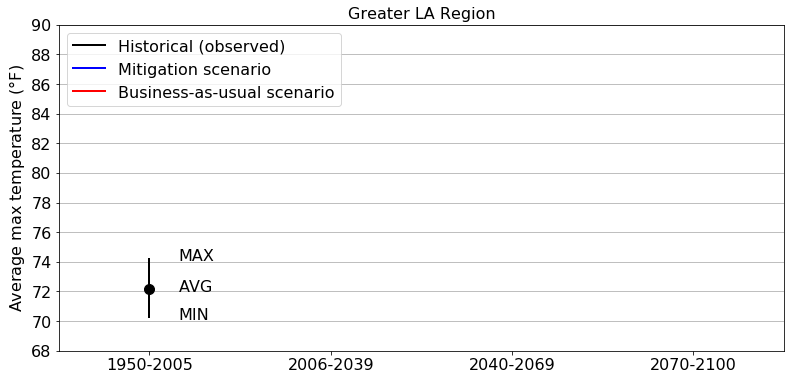

In [15]:
# LA Region for Water Symposium Talk ---- 
import pandas as pd
import seaborn as sns

df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/la_region_tmax_timeseries_rcp45.csv').\
        drop(['location','lat','lng','boundary','stat_type','units','scenario'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/la_region_tmax_timeseries_rcp85.csv').\
        drop(['location','lat','lng','boundary','stat_type','units','scenario'], axis=1)    

# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
mod1_2006_2099_45 = df45[df45['name']=='HadGEM2-ES rcp45']['value']
mod2_2006_2099_45 = df45[df45['name']=='CNRM-CM5 rcp45']['value']
mod3_2006_2099_45 = df45[df45['name']=='CanESM2 rcp45']['value']
mod4_2006_2099_45 = df45[df45['name']=='MIROC5 rcp45']['value']
mod5_2006_2099_45 = df45[df45['name']=='ACCESS1-0 rcp45']['value']
mod6_2006_2099_45 = df45[df45['name']=='CCSM4 rcp45']['value']
mod7_2006_2099_45 = df45[df45['name']=='CESM1-BGC rcp45']['value']
mod8_2006_2099_45 = df45[df45['name']=='CMCC-CMS rcp45']['value']
mod9_2006_2099_45 = df45[df45['name']=='GFDL-CM3 rcp45']['value']
mod10_2006_2099_45 = df45[df45['name']=='HadGEM2-CC rcp45']['value']
envelope_min_45 = df45[df45['name']=='modelled-variability-envelope']['min']
envelope_max_45 = df45[df45['name']=='modelled-variability-envelope']['max']

mod1_2006_2099_85 = df85[df85['name']=='HadGEM2-ES rcp85']['value']
mod2_2006_2099_85 = df85[df85['name']=='CNRM-CM5 rcp85']['value']
mod3_2006_2099_85 = df85[df85['name']=='CanESM2 rcp85']['value']
mod4_2006_2099_85 = df85[df85['name']=='MIROC5 rcp85']['value']
mod5_2006_2099_85 = df85[df85['name']=='ACCESS1-0 rcp85']['value']
mod6_2006_2099_85 = df85[df85['name']=='CCSM4 rcp85']['value']
mod7_2006_2099_85 = df85[df85['name']=='CESM1-BGC rcp85']['value']
mod8_2006_2099_85 = df85[df85['name']=='CMCC-CMS rcp85']['value']
mod9_2006_2099_85 = df85[df85['name']=='GFDL-CM3 rcp85']['value']
mod10_2006_2099_85 = df85[df85['name']=='HadGEM2-CC rcp85']['value']
envelope_min_85 = df85[df85['name']=='modelled-variability-envelope']['min']
envelope_max_85 = df85[df85['name']=='modelled-variability-envelope']['max']

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1950_2005_avg = obs_1950_2005.mean()
obs_1950_2005_min = obs_1950_2005.min()
obs_1950_2005_max = obs_1950_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
rcp_yrs = range(2006,2101)

fig = plt.figure(figsize=(13,6))
#ax1 = fig.add_subplot(1,2,1)
#ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical (observed)')
#ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
#                 alpha=0.25, label='RCP4.5 range')
#ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
#                 alpha=0.25, label='RCP8.5 range')
#ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
#ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
#ax1.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')

#ax1.set_title('a) Annual time series', fontsize=10)
#ax1.set_xticks(range(1960,2120,20))
#ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
#ax1.set_xlim(1960,2100)
#ax1.set_yticks(range(68,92,2))
#ax1.set_yticklabels(str(t) for t in range(68,92,2))
#ax1.set_ylim(68,90)
#plt.grid(True)
#plt.legend(loc='upper left')

# Bar chart summary panel ----
ax1 = fig.add_subplot(1,1,1)
ax1.plot([0,0], [obs_1950_2005_min, obs_1950_2005_max], color='black', linewidth=2, 
         label='Historical (observed)')
ax1.plot(0, obs_1950_2005_avg, 'ko', markersize=10)

# RCP4.5 lines
ax1.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='Mitigation scenario')
ax1.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax1.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax1.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax1.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax1.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)


#print(df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max())
#print(df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max())
#print(df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max())

# RCP8.5 lines
ax1.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='Business-as-usual scenario')
ax1.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax1.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax1.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax1.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax1.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax1.set_title('Greater LA Region', fontsize=16)
ax1.set_xticks(range(0,4))
ax1.set_xticklabels(['1950-2005', '2006-2039', '2040-2069', '2070-2100'], fontsize=16)
ax1.set_ylabel('Average max temperature '+'('+r'$\degree$'+'F)', fontsize=16)
ax1.set_xlim(-0.5,3.5)
ax1.set_yticks(range(68,92,2))
ax1.set_yticklabels([str(t) for t in range(68,92,2)], fontsize=16)
ax1.set_ylim(68,90)
ax1.yaxis.grid(True)
ax1.text(0.16, 72, 'AVG', color='black', fontsize=16)
ax1.text(0.16, 70.1, 'MIN', color='black', fontsize=16)
ax1.text(0.16, 74.1, 'MAX', color='black', fontsize=16)
plt.legend(loc='upper left', fontsize=16)#, frameon=False)
plt.savefig('/Users/nberg/Desktop/presentation_figures/LA_region_Tmax_timeseries_4.eps')
plt.show()

In [ ]:
# North Coast ---- 
import pandas as pd
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/nc_region_tmax_timeseries_rcp45.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/nc_region_tmax_timeseries_rcp85.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
ax1.set_yticks(range(58,78,2))
ax1.set_yticklabels(str(t) for t in range(58,78,2))
ax1.set_ylim(58,76)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')
ax2.set_xlim(-0.5,3.5)
ax2.set_yticks(range(58,78,2))
ax2.set_yticklabels(str(t) for t in range(58,78,2))
ax2.set_ylim(58,76)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 62, 'AVG', color='black')
ax2.text(0.2, 59, 'MIN', color='black')
ax2.text(0.2, 65, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
#plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/NC_region_Tmax_timeseries.png')
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/NC_region_Tmax_timeseries.pdf', dpi=300)
plt.show()    

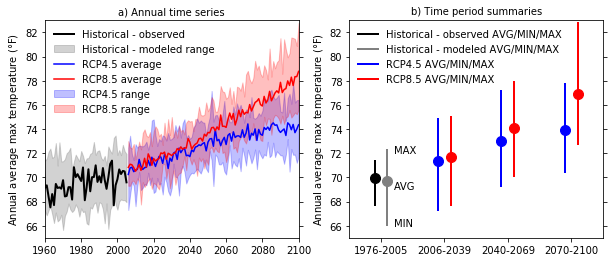

In [2]:
# SF Bay Area ---- 
import pandas as pd
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/sf_region_tmax_timeseries_rcp45.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/sf_region_tmax_timeseries_rcp85.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
#ax1.set_yticks(range(67,83,2))
#ax1.set_yticklabels(str(t) for t in range(58,78,2))
ax1.set_ylim(65,83)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)


# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')
ax2.set_xlim(-0.5,3.5)
#ax2.set_yticks(range(58,78,2))
#ax2.set_yticklabels(str(t) for t in range(58,78,2))
ax2.set_ylim(65,83)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 69, 'AVG', color='black')
ax2.text(0.2, 66, 'MIN', color='black')
ax2.text(0.2, 72, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/SF_region_Tmax_timeseries.jpeg', dpi=300)
plt.show()  

In [ ]:
# Inland South Area ---- 
import pandas as pd
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/is_region_tmax_timeseries_rcp45.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/is_region_tmax_timeseries_rcp85.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
#ax1.set_yticks(range(67,83,2))
#ax1.set_yticklabels(str(t) for t in range(58,78,2))
ax1.set_ylim(76,98)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')
ax2.set_xlim(-0.5,3.5)
#ax2.set_yticks(range(58,78,2))
#ax2.set_yticklabels(str(t) for t in range(58,78,2))
ax2.set_ylim(76,98)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 81.5, 'AVG', color='black')
ax2.text(0.2, 77.5, 'MIN', color='black')
ax2.text(0.2, 86, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/IS_region_Tmax_timeseries.pdf', dpi=300)
plt.show()  

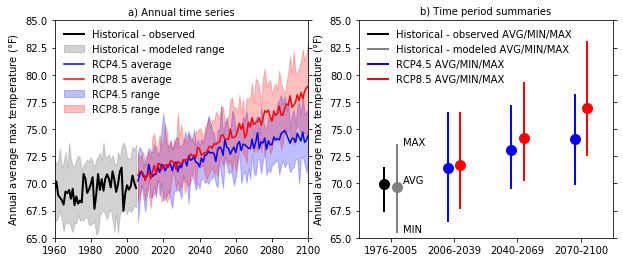

In [6]:
# Central Coast ---- 
import pandas as pd
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/cc_region_tmax_timeseries_rcp45.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/cc_region_tmax_timeseries_rcp85.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
#ax1.set_yticks(range(67,83,2))
#ax1.set_yticklabels(str(t) for t in range(58,78,2))
ax1.set_ylim(65,85)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')
ax2.set_xlim(-0.5,3.5)
#ax2.set_yticks(range(58,78,2))
#ax2.set_yticklabels(str(t) for t in range(58,78,2))
ax2.set_ylim(65,85)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 70, 'AVG', color='black')
ax2.text(0.2, 65.5, 'MIN', color='black')
ax2.text(0.2, 73.5, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/CC_region_Tmax_timeseries.jpeg', dpi=300)
plt.show() 

In [ ]:
# STATEWIDE ---- 
import pandas as pd
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/ca_state_tmax_timeseries_rcp45.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_tmax/ca_state_tmax_timeseries_rcp85.csv').\
        drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='dodgerblue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='dodgerblue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
ax1.set_yticks(range(66,88,2))
ax1.set_yticklabels(str(t) for t in range(66,88,2))
ax1.set_ylim(66,86)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='dodgerblue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), color='dodgerblue', marker='o', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='dodgerblue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), color='dodgerblue', marker='o', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='dodgerblue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), color='dodgerblue', marker='o', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average max temperature '+'('+r'$\degree$'+'F)')
ax2.set_xlim(-0.5,3.5)
ax2.set_yticks(range(66,88,2))
ax2.set_yticklabels(str(t) for t in range(66,88,2))
ax2.set_ylim(66,86)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 70, 'AVG', color='black')
ax2.text(0.2, 67, 'MIN', color='black')
ax2.text(0.2, 73.5, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/CA_state_Tmax_timeseries.eps', dpi=400)
plt.show() 

print(df45_all_mod.mean(axis=1)[0:35].mean())
print(df45_all_mod.mean(axis=1)[35:65].mean())
print(df45_all_mod.mean(axis=1)[65:95].mean())

# 1950-2100 time series of annual precipitation

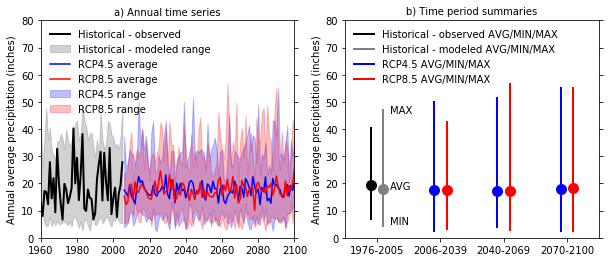

In [8]:
import pandas as pd 

# LA Region
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_pr/la_region_pr_timeseries_rcp45.csv').\
    drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_pr/la_region_pr_timeseries_rcp85.csv').\
    drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    
    
# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average precipitation (inches)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
#ax1.set_yticks(range(67,83,2))
#ax1.set_yticklabels(str(t) for t in range(58,78,2))
ax1.set_ylim(0,80)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average precipitation (inches)')
ax2.set_xlim(-0.5,3.5)
#ax2.set_yticks(range(58,78,2))
#ax2.set_yticklabels(str(t) for t in range(58,78,2))
ax2.set_ylim(0,80)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 18, 'AVG', color='black')
ax2.text(0.2, 5, 'MIN', color='black')
ax2.text(0.2, 46, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/LA_region_PR_timeseries.jpeg')
#plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/LA_region_PR_timeseries.pdf', dpi=300)
plt.show() 

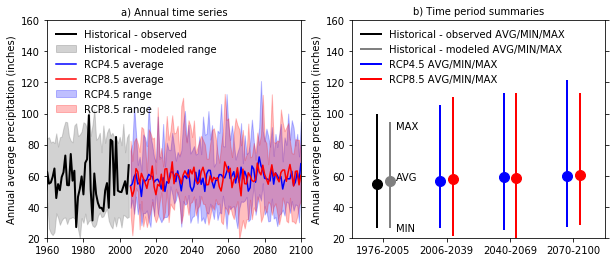

In [3]:
# NORTH COAST ---- 
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_pr/nc_region_pr_timeseries_rcp45.csv').\
    drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_pr/nc_region_pr_timeseries_rcp85.csv').\
    drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

    
# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average precipitation (inches)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
#ax1.set_yticks(range(67,83,2))
#ax1.set_yticklabels(str(t) for t in range(58,78,2))
ax1.set_ylim(20,160)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average precipitation (inches)')
ax2.set_xlim(-0.5,3.5)
#ax2.set_yticks(range(58,78,2))
#ax2.set_yticklabels(str(t) for t in range(58,78,2))
ax2.set_ylim(20,160)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 57, 'AVG', color='black')
ax2.text(0.2, 24, 'MIN', color='black')
ax2.text(0.2, 90, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/NC_region_PR_timeseries.pdf', dpi=300)
plt.show() 


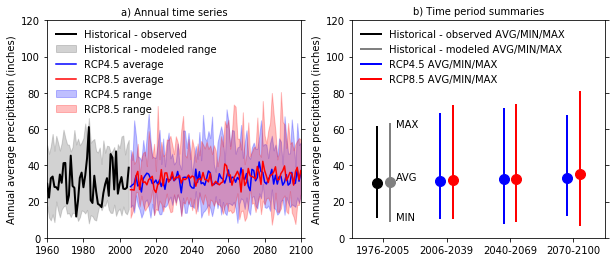

In [3]:
import pandas as pd
# SF Bay Area ---- 
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_pr/sf_region_pr_timeseries_rcp45.csv').\
    drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_pr/sf_region_pr_timeseries_rcp85.csv').\
    drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average precipitation (inches)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
#ax1.set_yticks(range(67,83,2))
#ax1.set_yticklabels(str(t) for t in range(58,78,2))
ax1.set_ylim(0,120)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average precipitation (inches)')
ax2.set_xlim(-0.5,3.5)
#ax2.set_yticks(range(58,78,2))
#ax2.set_yticklabels(str(t) for t in range(58,78,2))
ax2.set_ylim(0,120)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 32, 'AVG', color='black')
ax2.text(0.2, 10, 'MIN', color='black')
ax2.text(0.2, 61, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/SF_region_PR_timeseries.jpeg', dpi=300)
plt.show()     

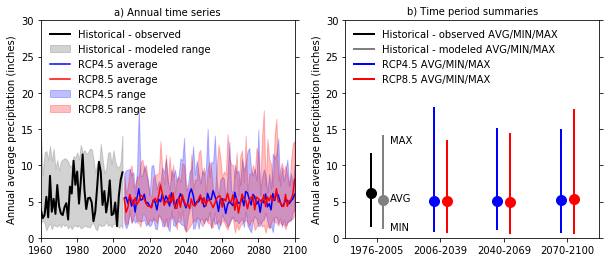

In [8]:
# Inland South ---- 
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_pr/is_region_pr_timeseries_rcp45.csv').\
    drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_pr/is_region_pr_timeseries_rcp85.csv').\
    drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

  # Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average precipitation (inches)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
#ax1.set_yticks(range(67,83,2))
#ax1.set_yticklabels(str(t) for t in range(58,78,2))
ax1.set_ylim(0,30)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average precipitation (inches)')
ax2.set_xlim(-0.5,3.5)
#ax2.set_yticks(range(58,78,2))
#ax2.set_yticklabels(str(t) for t in range(58,78,2))
ax2.set_ylim(0,30)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 5, 'AVG', color='black')
ax2.text(0.2, 1, 'MIN', color='black')
ax2.text(0.2, 13, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/IS_region_PR_timeseries.pdf', dpi=300)
plt.show()   


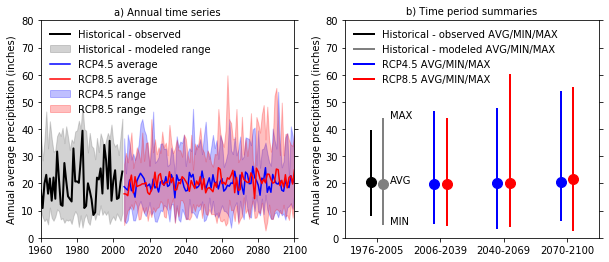

In [7]:
# Central Coast ---- 
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_pr/cc_region_pr_timeseries_rcp45.csv').\
    drop(['location','lat','lng','boundary','stat_type','units'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_pr/cc_region_pr_timeseries_rcp85.csv').\
    drop(['location','lat','lng','boundary','stat_type','units'], axis=1)    

# Extract annual values 
obs_1950_2005 = df45[df45['name']=='livneh']['value']
obs_1976_2005 = df45[df45['name']=='livneh']['value'][-30:]

# Historical (1976-2005) modeled annual averages
mod1_1976_2005 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='historical')]['value'][-30:]
mod2_1976_2005 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='historical')]['value'][-30:]
mod3_1976_2005 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='historical')]['value'][-30:]
mod4_1976_2005 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='historical')]['value'][-30:]
mod5_1976_2005 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='historical')]['value'][-30:]
mod6_1976_2005 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='historical')]['value'][-30:]
mod7_1976_2005 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='historical')]['value'][-30:]
mod8_1976_2005 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='historical')]['value'][-30:]
mod9_1976_2005 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='historical')]['value'][-30:]
mod10_1976_2005 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='historical')]['value'][-30:]

# Historical (1950-2005) modeled variability envelope
hist_mod_1950_2005_min = df45[df45['name']=='modelled-variability-envelope']['min'][0:56]
hist_mod_1950_2005_max = df45[df45['name']=='modelled-variability-envelope']['max'][0:56]

# Modeled 2006-2099 RCP4.5 
mod1_2006_2099_45 = df45[(df45['name']=='HadGEM2-ES') & (df45['scenario']=='rcp45')]['value']
mod2_2006_2099_45 = df45[(df45['name']=='CNRM-CM5') & (df45['scenario']=='rcp45')]['value']
mod3_2006_2099_45 = df45[(df45['name']=='CanESM2') & (df45['scenario']=='rcp45')]['value']
mod4_2006_2099_45 = df45[(df45['name']=='MIROC5') & (df45['scenario']=='rcp45')]['value']
mod5_2006_2099_45 = df45[(df45['name']=='ACCESS1-0') & (df45['scenario']=='rcp45')]['value']
mod6_2006_2099_45 = df45[(df45['name']=='CCSM4') & (df45['scenario']=='rcp45')]['value']
mod7_2006_2099_45 = df45[(df45['name']=='CESM1-BGC') & (df45['scenario']=='rcp45')]['value']
mod8_2006_2099_45 = df45[(df45['name']=='CMCC-CMS') & (df45['scenario']=='rcp45')]['value']
mod9_2006_2099_45 = df45[(df45['name']=='GFDL-CM3') & (df45['scenario']=='rcp45')]['value']
mod10_2006_2099_45 = df45[(df45['name']=='HadGEM2-CC') & (df45['scenario']=='rcp45')]['value']

# Modeled 2006-2099 RCP8.5 
mod1_2006_2099_85 = df85[(df85['name']=='HadGEM2-ES') & (df85['scenario']=='rcp85')]['value']
mod2_2006_2099_85 = df85[(df85['name']=='CNRM-CM5') & (df85['scenario']=='rcp85')]['value']
mod3_2006_2099_85 = df85[(df85['name']=='CanESM2') & (df85['scenario']=='rcp85')]['value']
mod4_2006_2099_85 = df85[(df85['name']=='MIROC5') & (df85['scenario']=='rcp85')]['value']
mod5_2006_2099_85 = df85[(df85['name']=='ACCESS1-0') & (df85['scenario']=='rcp85')]['value']
mod6_2006_2099_85 = df85[(df85['name']=='CCSM4') & (df85['scenario']=='rcp85')]['value']
mod7_2006_2099_85 = df85[(df85['name']=='CESM1-BGC') & (df85['scenario']=='rcp85')]['value']
mod8_2006_2099_85 = df85[(df85['name']=='CMCC-CMS') & (df85['scenario']=='rcp85')]['value']
mod9_2006_2099_85 = df85[(df85['name']=='GFDL-CM3') & (df85['scenario']=='rcp85')]['value']
mod10_2006_2099_85 = df85[(df85['name']=='HadGEM2-CC') & (df85['scenario']=='rcp85')]['value']

# Concatenated dataframes
dfhist_all_mod = pd.concat(
                [mod1_1976_2005.reset_index(drop=True),
                 mod2_1976_2005.reset_index(drop=True),
                 mod3_1976_2005.reset_index(drop=True),
                 mod4_1976_2005.reset_index(drop=True),
                 mod5_1976_2005.reset_index(drop=True),
                 mod6_1976_2005.reset_index(drop=True),
                 mod7_1976_2005.reset_index(drop=True),
                 mod8_1976_2005.reset_index(drop=True),
                 mod9_1976_2005.reset_index(drop=True),
                 mod10_1976_2005.reset_index(drop=True)], axis=1)

df45_all_mod = pd.concat(
                [mod1_2006_2099_45.reset_index(drop=True), 
                 mod2_2006_2099_45.reset_index(drop=True),
                 mod3_2006_2099_45.reset_index(drop=True),
                 mod4_2006_2099_45.reset_index(drop=True),
                 mod5_2006_2099_45.reset_index(drop=True),
                 mod6_2006_2099_45.reset_index(drop=True),
                 mod7_2006_2099_45.reset_index(drop=True),
                 mod8_2006_2099_45.reset_index(drop=True),
                 mod9_2006_2099_45.reset_index(drop=True),
                 mod10_2006_2099_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_2006_2099_85.reset_index(drop=True), 
                 mod2_2006_2099_85.reset_index(drop=True),
                 mod3_2006_2099_85.reset_index(drop=True),
                 mod4_2006_2099_85.reset_index(drop=True),
                 mod5_2006_2099_85.reset_index(drop=True),
                 mod6_2006_2099_85.reset_index(drop=True),
                 mod7_2006_2099_85.reset_index(drop=True),
                 mod8_2006_2099_85.reset_index(drop=True),
                 mod9_2006_2099_85.reset_index(drop=True),
                 mod10_2006_2099_85.reset_index(drop=True)], axis=1)

# Time period summaries for the bar chart (1950-2005, 2006-2039, 2040-2069, 2070-2100)
obs_1976_2005_avg = obs_1976_2005.mean()
obs_1976_2005_min = obs_1976_2005.min()
obs_1976_2005_max = obs_1976_2005.max()

# 10-priorty model averages 
model_mean_rcp45_2006_2039 = df45_all_mod[0:35].mean(axis=1)
model_mean_rcp45_2040_2069 = df45_all_mod[35:65].mean(axis=1)
model_mean_rcp45_2070_2100 = df45_all_mod[65:95].mean(axis=1)
model_mean_rcp85_2006_2039 = df85_all_mod[0:35].mean(axis=1)
model_mean_rcp85_2040_2069 = df85_all_mod[35:65].mean(axis=1)
model_mean_rcp85_2070_2100 = df85_all_mod[65:95].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1950,2006)
hist_yrs2 = range(1976,2006)
rcp_yrs = range(2006,2101)


fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.fill_between(hist_yrs, hist_mod_1950_2005_min, hist_mod_1950_2005_max, color='grey', alpha=0.35, 
                 label='Historical - modeled range')
ax1.plot(hist_yrs, obs_1950_2005, color='black', linewidth=2, label='Historical - observed')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1), df45_all_mod.max(axis=1), color='blue', 
                 alpha=0.25, label='RCP4.5 range')
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1), df85_all_mod.max(axis=1), color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1), color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1), color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average precipitation (inches)')

ax1.set_title('a) Annual time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(1960,2100)
#ax1.set_yticks(range(67,83,2))
#ax1.set_yticklabels(str(t) for t in range(58,78,2))
ax1.set_ylim(0,80)
ax1.yaxis.set_ticks_position('both')
#plt.grid(True)
#plt.legend(loc='upper left')

handles,labels = ax1.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[2], handles[4], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[2], labels[4], labels[5]]

ax1.legend(handles, labels, loc='upper left', frameon=False)

# Bar chart summary panel ----
ax2 = fig.add_subplot(1,2,2)

# Observed and modeled historical lines
ax2.plot([-0.1,-0.1], [obs_1976_2005_min, obs_1976_2005_max], color='black', linewidth=2, 
         label='Historical - observed AVG/MIN/MAX')
ax2.plot(-0.1, obs_1976_2005_avg, 'ko', markersize=10)
ax2.plot([0.1,0.1], [dfhist_all_mod.min(axis=1).min(), dfhist_all_mod.max(axis=1).max()], color='grey', linewidth=2, 
         label='Historical - modeled AVG/MIN/MAX')
ax2.plot(0.1, dfhist_all_mod.mean(axis=1).mean(), color='grey', marker='o', markersize=10)

# RCP4.5 lines
ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[0:35].min(), df45_all_mod.max(axis=1)[0:35].max()], 
         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
ax2.plot(0.9, df45_all_mod.mean(axis=1)[0:35].mean(), 'bo', markersize=10)
ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[35:65].min(), df45_all_mod.max(axis=1)[35:65].max()], 
         color='blue', linewidth=2)
ax2.plot(1.9, df45_all_mod.mean(axis=1)[35:65].mean(), 'bo', markersize=10)
ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[65:95].min(), df45_all_mod.max(axis=1)[65:95].max()], 
         color='blue', linewidth=2)
ax2.plot(2.9, df45_all_mod.mean(axis=1)[65:95].mean(), 'bo', markersize=10)

# RCP8.5 lines
ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].min(), df85_all_mod.max(axis=1)[0:35].max()], 
         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].min(), df85_all_mod.max(axis=1)[35:65].max()], 
         color='red', linewidth=2)
ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].min(), df85_all_mod.max(axis=1)[65:95].max()], 
         color='red', linewidth=2)
ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

ax2.set_title('b) Time period summaries', fontsize=10)
ax2.set_xticks(range(0,4))
ax2.set_xticklabels(['1976-2005', '2006-2039', '2040-2069', '2070-2100'])
ax2.set_ylabel('Annual average precipitation (inches)')
ax2.set_xlim(-0.5,3.5)
#ax2.set_yticks(range(58,78,2))
#ax2.set_yticklabels(str(t) for t in range(58,78,2))
ax2.set_ylim(0,80)
ax2.yaxis.set_ticks_position('both')
#ax2.yaxis.grid(True)
ax2.text(0.2, 20, 'AVG', color='black')
ax2.text(0.2, 5, 'MIN', color='black')
ax2.text(0.2, 44, 'MAX', color='black')
plt.legend(loc='upper left', frameon=False)
plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/CC_region_PR_timeseries.jpeg', dpi=300)
plt.show()     


# 1954-2100 wilfire projections

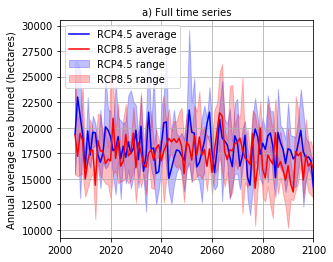

In [236]:
df45 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_fire/la_region_fire_timeseries_rcp45.csv').\
        drop(['location','lat','lng','boundary','stat_type','units','scenario'], axis=1)

df85 = pd.read_csv('/Users/nberg/Documents/CA4thAssessment/data/loca_fire/la_region_fire_timeseries_rcp85.csv').\
        drop(['location','lat','lng','boundary','stat_type','units','scenario'], axis=1)    


# Extract annual values 
mod1_1954_2100_45 = df45[df45['name']=='HadGEM2-ES']['value']
mod2_1954_2100_45 = df45[df45['name']=='CNRM-CM5']['value']
mod3_1954_2100_45 = df45[df45['name']=='CanESM2']['value']
mod4_1954_2100_45 = df45[df45['name']=='MIROC5']['value']

mod1_1954_2100_85 = df85[df85['name']=='HadGEM2-ES']['value']
mod2_1954_2100_85 = df85[df85['name']=='CNRM-CM5']['value']
mod3_1954_2100_85 = df85[df85['name']=='CanESM2']['value']
mod4_1954_2100_85 = df85[df85['name']=='MIROC5']['value']

df45_all_mod = pd.concat(
                [mod1_1954_2100_45.reset_index(drop=True), 
                 mod2_1954_2100_45.reset_index(drop=True),
                 mod3_1954_2100_45.reset_index(drop=True),
                 mod4_1954_2100_45.reset_index(drop=True)], axis=1)

df85_all_mod = pd.concat(
                [mod1_1954_2100_85.reset_index(drop=True), 
                 mod2_1954_2100_85.reset_index(drop=True),
                 mod3_1954_2100_85.reset_index(drop=True),
                 mod4_1954_2100_85.reset_index(drop=True)], axis=1)

# 4-priorty model averages 
#model_mean_rcp45_1960_2005 = df45_all_mod[7:52].mean(axis=1)
#model_mean_rcp45_2006_2039 = df45_all_mod[52:86].mean(axis=1)
#model_mean_rcp45_2040_2069 = df45_all_mod[86:116].mean(axis=1)
#model_mean_rcp45_2070_2100 = df45_all_mod[116:147].mean(axis=1)
#model_mean_rcp85_1960_2005 = df85_all_mod[7:52].mean(axis=1)
#model_mean_rcp85_2006_2039 = df85_all_mod[52:86].mean(axis=1)
#model_mean_rcp85_2040_2069 = df85_all_mod[86:116].mean(axis=1)
#model_mean_rcp85_2070_2100 = df85_all_mod[116:147].mean(axis=1)

# Time series panel ----
all_yrs = range(1950,2101)
hist_yrs = range(1960,2006)
rcp_yrs = range(2006,2101)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
#ax1.plot(hist_yrs, df45_all_mod.mean(axis=1)[6:52], color='black', linewidth=2, label='Historical (simulated)')
ax1.fill_between(rcp_yrs, df45_all_mod.min(axis=1)[52:147], df45_all_mod.max(axis=1)[52:147], color='blue', 
                 alpha=0.25, label='RCP4.5 range')#
ax1.fill_between(rcp_yrs, df85_all_mod.min(axis=1)[52:147], df85_all_mod.max(axis=1)[52:147], color='red', 
                 alpha=0.25, label='RCP8.5 range')
ax1.plot(rcp_yrs, df45_all_mod.mean(axis=1)[52:147], color='blue', label='RCP4.5 average')
ax1.plot(rcp_yrs, df85_all_mod.mean(axis=1)[52:147], color='red', label='RCP8.5 average')
ax1.set_ylabel('Annual average area burned (hectares)')

ax1.set_title('a) Full time series', fontsize=10)
ax1.set_xticks(range(1960,2120,20))
ax1.set_xticklabels([str(yr) for yr in range(1960,2120,20)])
ax1.set_xlim(2000,2100)
#ax1.set_yticks(range(68,90,2))
#ax1.set_yticklabels(str(t) for t in range(68,90,2))
#ax1.set_ylim(0,80)
plt.grid(True)
plt.legend(loc='upper left')

# Bar chart summary panel ----
#ax2 = fig.add_subplot(1,2,2)
#ax2.plot([0,0], [df45_all_mod.min(axis=1)[6:52].mean(), df45_all_mod.max(axis=1)[6:52].mean()], 
#         color='black', linewidth=2, label='Historical (simulated) AVG/MIN/MAX')
#ax2.plot(0, df45_all_mod.mean(axis=1)[6:52].mean(), 'ko', markersize=10)

# RCP4.5 lines
#ax2.plot([0.9,0.9], [df45_all_mod.min(axis=1)[52:86].mean(), df45_all_mod.max(axis=1)[52:86].mean()], 
#         color='blue', linewidth=2, label='RCP4.5 AVG/MIN/MAX')
#ax2.plot(0.9, df45_all_mod.mean(axis=1)[52:86].mean(), 'bo', markersize=10)
#ax2.plot([1.9,1.9], [df45_all_mod.min(axis=1)[86:147].mean(), df45_all_mod.max(axis=1)[86:147].mean()], 
#         color='blue', linewidth=2)
#ax2.plot(1.9, df45_all_mod.mean(axis=1)[86:147].mean(), 'bo', markersize=10)
#ax2.plot([2.9,2.9], [df45_all_mod.min(axis=1)[116:147].mean(), df45_all_mod.max(axis=1)[116:147].mean()], 
#         color='blue', linewidth=2)
#ax2.plot(2.9, df45_all_mod.mean(axis=1)[116:147].mean(), 'bo', markersize=10)


# RCP8.5 lines
#ax2.plot([1.1,1.1], [df85_all_mod.min(axis=1)[0:35].mean(), df85_all_mod.max(axis=1)[0:35].mean()], 
#         color='red', linewidth=2, label='RCP8.5 AVG/MIN/MAX')
#ax2.plot(1.1, df85_all_mod.mean(axis=1)[0:35].mean(), 'ro', markersize=10)
#ax2.plot([2.1,2.1], [df85_all_mod.min(axis=1)[35:65].mean(), df85_all_mod.max(axis=1)[35:65].mean()], 
#         color='red', linewidth=2)
#ax2.plot(2.1, df85_all_mod.mean(axis=1)[35:65].mean(), 'ro', markersize=10)
#ax2.plot([3.1,3.1], [df85_all_mod.min(axis=1)[65:95].mean(), df85_all_mod.max(axis=1)[65:95].mean()], 
#         color='red', linewidth=2)
#ax2.plot(3.1, df85_all_mod.mean(axis=1)[65:95].mean(), 'ro', markersize=10)

#ax2.set_title('b) Time period summaries', fontsize=10)
#ax2.set_xticks(range(0,4))
#ax2.set_xticklabels(['1950-2005', '2006-2039', '2040-2069', '2070-2100'])
#ax2.set_ylabel('Annual average area burnbed (hectares)')
#ax2.set_xlim(-0.5,3.5)
#ax2.set_ylim(0,80)
#ax2.yaxis.grid(True)
#ax2.text(0.1, 18.5, 'AVG', color='black')
#ax2.text(0.1, 6.5, 'MIN', color='black')
#ax2.text(0.1, 40, 'MAX', color='black')
#plt.legend(loc='upper left')
#plt.savefig('/Users/nberg/Documents/CA4thAssessment/figures/LA_region_Pr_timeseries.png')
plt.show()